# Credit card customer churn prediction and segmentation 

## Define the problom

The problem was brought to us:

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

The goal is to predict who will churn and find out why they churn from the provided data set. According to the prediction and the possible churning reason, we provide the manager some insights for retension strategies. 

## Solution

To help the bank lowering its customer churn rate, I am planning to use machine learning techniques to predict which customers are likely to churn and provide insights on retention strategies. The bank manager can identify those customers and take action to try to retain them.

My first step is to build a classification model and find the churners. This is particularly important for businesses with high churn rates, as it can help them to minimize the number of customers they lose.

The next step is to do customer segmentation on the churners in the dataset, which helps to understand who the churners are. It will segment the churners into smaller groups with similar characteristics, and will allow the bank manager to gain an in-depth understanding of the needs and preferences of each group, and implement retension strategy accordingly..

The data set was from Kaggle. The link is below.

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&sortBy=voteCount

## loading data and libraries

In [1]:
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for data preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.over_sampling import SMOTE

# for dimention reduction and visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# for correlation analysis
from scipy import stats
import phik
from phik import resources, report

# for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.feature_selection import RFECV

# clustering models
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes


from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score



# classification Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from lightgbm import LGBMClassifier

# clustering metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# classification Metrics
from sklearn import metrics
from sklearn.metrics import (
    auc,
    roc_curve,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# for data balance
from imblearn.over_sampling import SMOTE

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# for model explanation 
import shap
shap.initjs()


# deployment
import pickle

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# import data
df = pd.read_csv('./BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.shape

(10127, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# drop 3 columns 'CLIENTNUM', 
# and 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
# and 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
# because those columns are not related to the analysis
df = df.drop(columns=df.columns[[0,-2,-1]], axis=1)

In [8]:
df.shape

(10127, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Below is the description of all columns

|Feature|Description|
|----------|:------------------------------------------------------------------------------|
|Attrition_Flag |Label - customer churn info|
|Customer_Age   |Demographic variable - Customer's Age in Years|
|Gender         |Demographic variable - M=Male, F=Female|
|Dependent_count|Demographic variable - Number of dependents|
|Education_Level|Demographic variable - Educational Qualification of the account holder|
|Marital_Status |Demographic variable - Married, Single, Divorced, Unknown|
|Income_Category|Demographic variable - Annual Income Category of the account holder |
|Months_on_book          |Bank relation - Period of relationship with bank|
|Total_Relationship_Count|Bank relation - Total no. of products held by the customer|
|Months_Inactive_12_mon  |Bank relation - No. of months inactive in the last 12 months|
|Contacts_Count_12_mon   |Bank relation - No. of Contacts in the last 12 months|
|Card_Category           |Credit card - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Credit_Limit            |Credit card - Credit Limit on the Credit Card|
|Total_Revolving_Bal     |Credit card - Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy         |Credit card - Open to Buy Credit Line (Average of last 12 months)|
|Total_Amt_Chng_Q4_Q1    |Credit card - Change in Transaction Amount (Q4 over Q1)|
|Total_Trans_Amt         |Credit card - Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct          |Credit card - Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1     |Credit card - Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio   |Credit card - Average Card Utilization Ratio|

**Data at a glance**:

The original data set contains 10127 customers and 23 features. As guided from the data source, 3 features are not used for the analysis and were removed from the dataset. Therefore, the dataset which will be used for this analysis contain 10127 customers and 20 features.

As shown above, the target feature is 'Attrition_Flag', which shows if the customer churned or not. The churners are labeled as 'Attrited customer', and the remaining customers are labeled as 'Existing customer'. The other 19 features including 14 numerical and 5 categorical attributes. Those are customer demographic and behavioral features.

## Explorary data analysis

### Missing Values and Unique Values

In [10]:
print("No Missing Data in this Dataset",'\n')
print(df.isnull().sum())

No Missing Data in this Dataset 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


<AxesSubplot:>

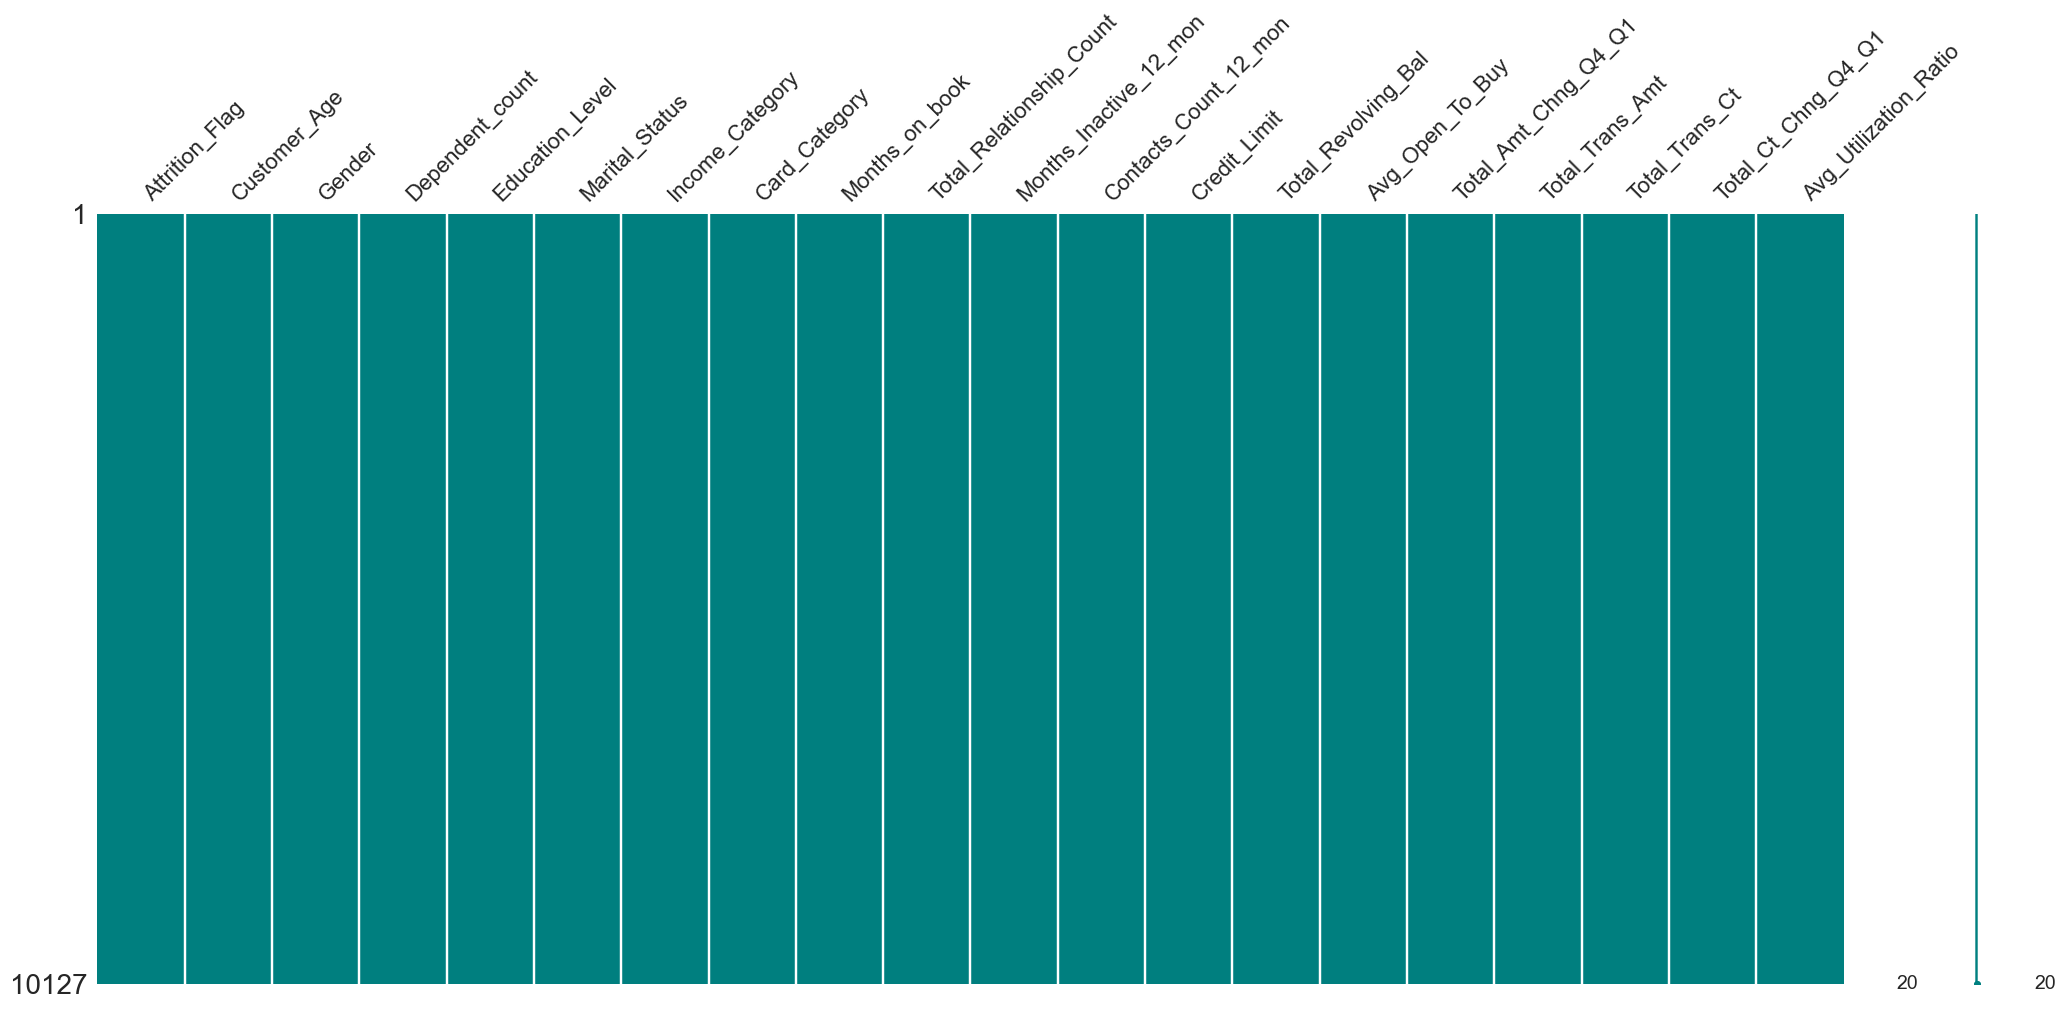

In [11]:
#Visualize the missing values in the dataframe! 
import missingno as mno
mno.matrix(df , color=(0, 0.5, 0.5))

In [12]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


In [18]:
print("Unique values in each categorical column:", '\n')
for col in df.select_dtypes(include=[object]):
    if(col != 'Attrition_Flag'):
         print(col,":", df[col].unique(), '\n')

Unique values in each categorical column: 

Gender : ['M' 'F'] 

Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced'] 

Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum'] 



**Although there is no apprant missing values, there are category "unknown" in columns  Education_Level, Marital_Status and Income_Category. Need to treat that as missing values and consider ways to fillin.**

### Target analysis

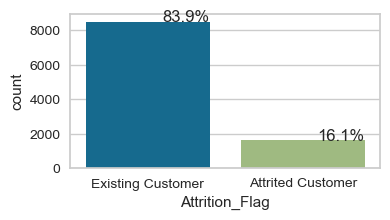

In [32]:
# fig, ax = plt.subplots(figsize=(5,3))
# s = df['Attrition_Flag'].value_counts(normalize=True)
# sns.barplot(x=s.index, y=s, ax=ax)

plt.figure(figsize=(4,2))
ax = sns.countplot(x=df['Attrition_Flag'])
total = len(df['Attrition_Flag'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

**Target label is imbalanced. Need to consider balancing the data using either class weight or SMOTE in modeling**

### Univariate analysis

There are a total of 19 features including 14 numerical and 5 categorical attributes. Purpose is to examine data distribution. Check how each feature correlates with target to get a sense how likely that feature contributes to churn prediction.

#### Categorical variables

In [34]:
# categorical features, remove 'Attrition_Flag'
cat_cols = df.drop(columns='Attrition_Flag').select_dtypes(include="O").columns
cat_cols

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [35]:
# check the categories in each categorical features
for col in cat_cols:
    print(f'Unique valus and their counts in feature {col}')
    print(df[col].value_counts(normalize=True), '\n')

Unique valus and their counts in feature Gender
F    0.529081
M    0.470919
Name: Gender, dtype: float64 

Unique valus and their counts in feature Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64 

Unique valus and their counts in feature Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64 

Unique valus and their counts in feature Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64 

Unique valus and their counts in feature Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64 


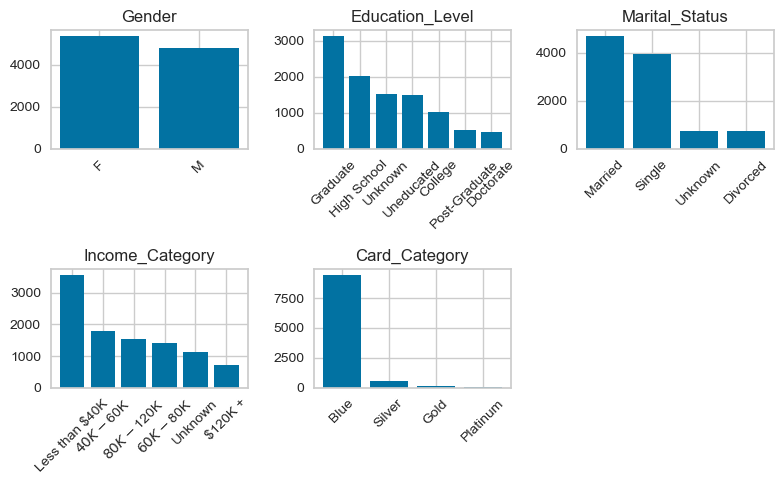

In [40]:
fig = plt.figure(figsize=(8, 5))
# fig.subplots_adjust(hspace=1.5, wspace=0.8)
for i,var in enumerate(cat_cols):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var])
    ax.set_title(var)
    ax.tick_params(axis='x', labelrotation = 45)
plt.tight_layout()

- **Most customers only have blue card.**
- **significant of Unknown customers in columns Educational_Level, Marital_status, and Income_Category.**

Text(0.5, 1.0, 'Income')

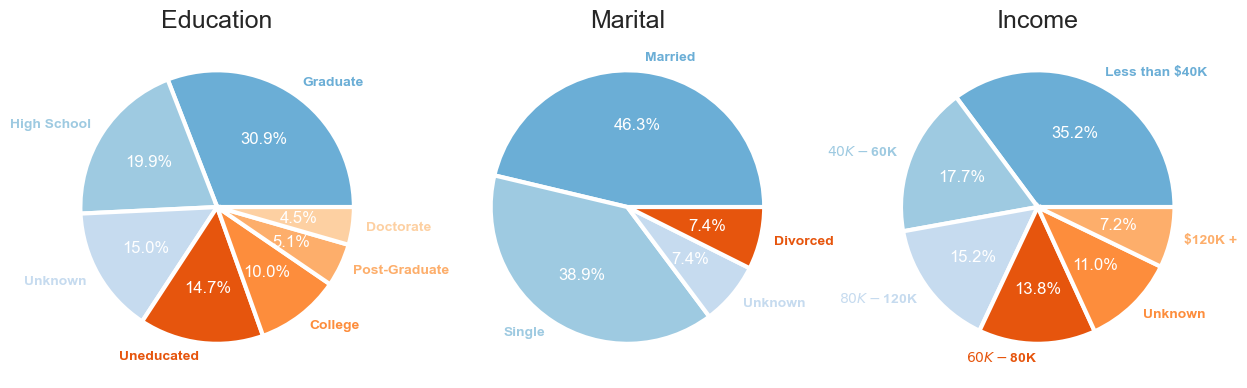

In [41]:
edu_d = df['Education_Level'].value_counts().to_dict()
marry_d = df['Marital_Status'].value_counts().to_dict()
income_d = df['Income_Category'].value_counts().to_dict()

edu = list(edu_d.values())
marry = list(marry_d.values())
income = list(income_d.values())
label1 = list(edu_d.keys())
label2 = list(marry_d.keys())
label3 = list(income_d.keys())

cmap = plt.get_cmap("tab20c")
ar = np.concatenate((np.arange(1,10), [13,15,17,19], [25,30]))
outer_colors = cmap(np.array([0, 10, 20]))
inner_colors = cmap(ar)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))


patches, texts, pcts = ax[0].pie(
    edu, labels = label1, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[0].set_title('Education', fontsize=18)



patches, texts, pcts = ax[1].pie(
    marry, labels = label2, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[1].set_title('Marital', fontsize=18)



patches, texts, pcts = ax[2].pie(
    income, labels = label3, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[2].set_title('Income', fontsize=18)


**Significant amount of unknown data in 'Education_Level','Marital_Status','Income_Category'. It is not proper to impute the values. I will use unknown as a category**

**Check how categorical variables correlate with churn rate**

In [73]:
def countplot_churn(cat, data):
    fig = plt.figure(figsize=(22, 16))
#     fig, axes = plt.subplots(2, 3, figsize=(22, 16))
#     fig.subplots_adjust(hspace=0.5, wspace=0.8)
#     axes = axes.flatten()
    fig.suptitle('Categorical Features Distributions by Churn',fontsize=30)
    for i, col in enumerate(cat):
        ax = fig.add_subplot(2, 3, i+1)
        sns.countplot(x=col,data=data,hue='Attrition_Flag',
#                       palette='rocket',
                      ax=ax)
        ax.legend(title='Churn',loc='upper right',labels=['No', 'Yes'], fontsize=20)     
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=12)
        plt.ylabel('Count', fontsize=20, weight='bold')
        
        plt.tick_params(axis='x', labelsize=18)
        plt.tick_params(axis='y', labelsize=12)
    plt.tight_layout()

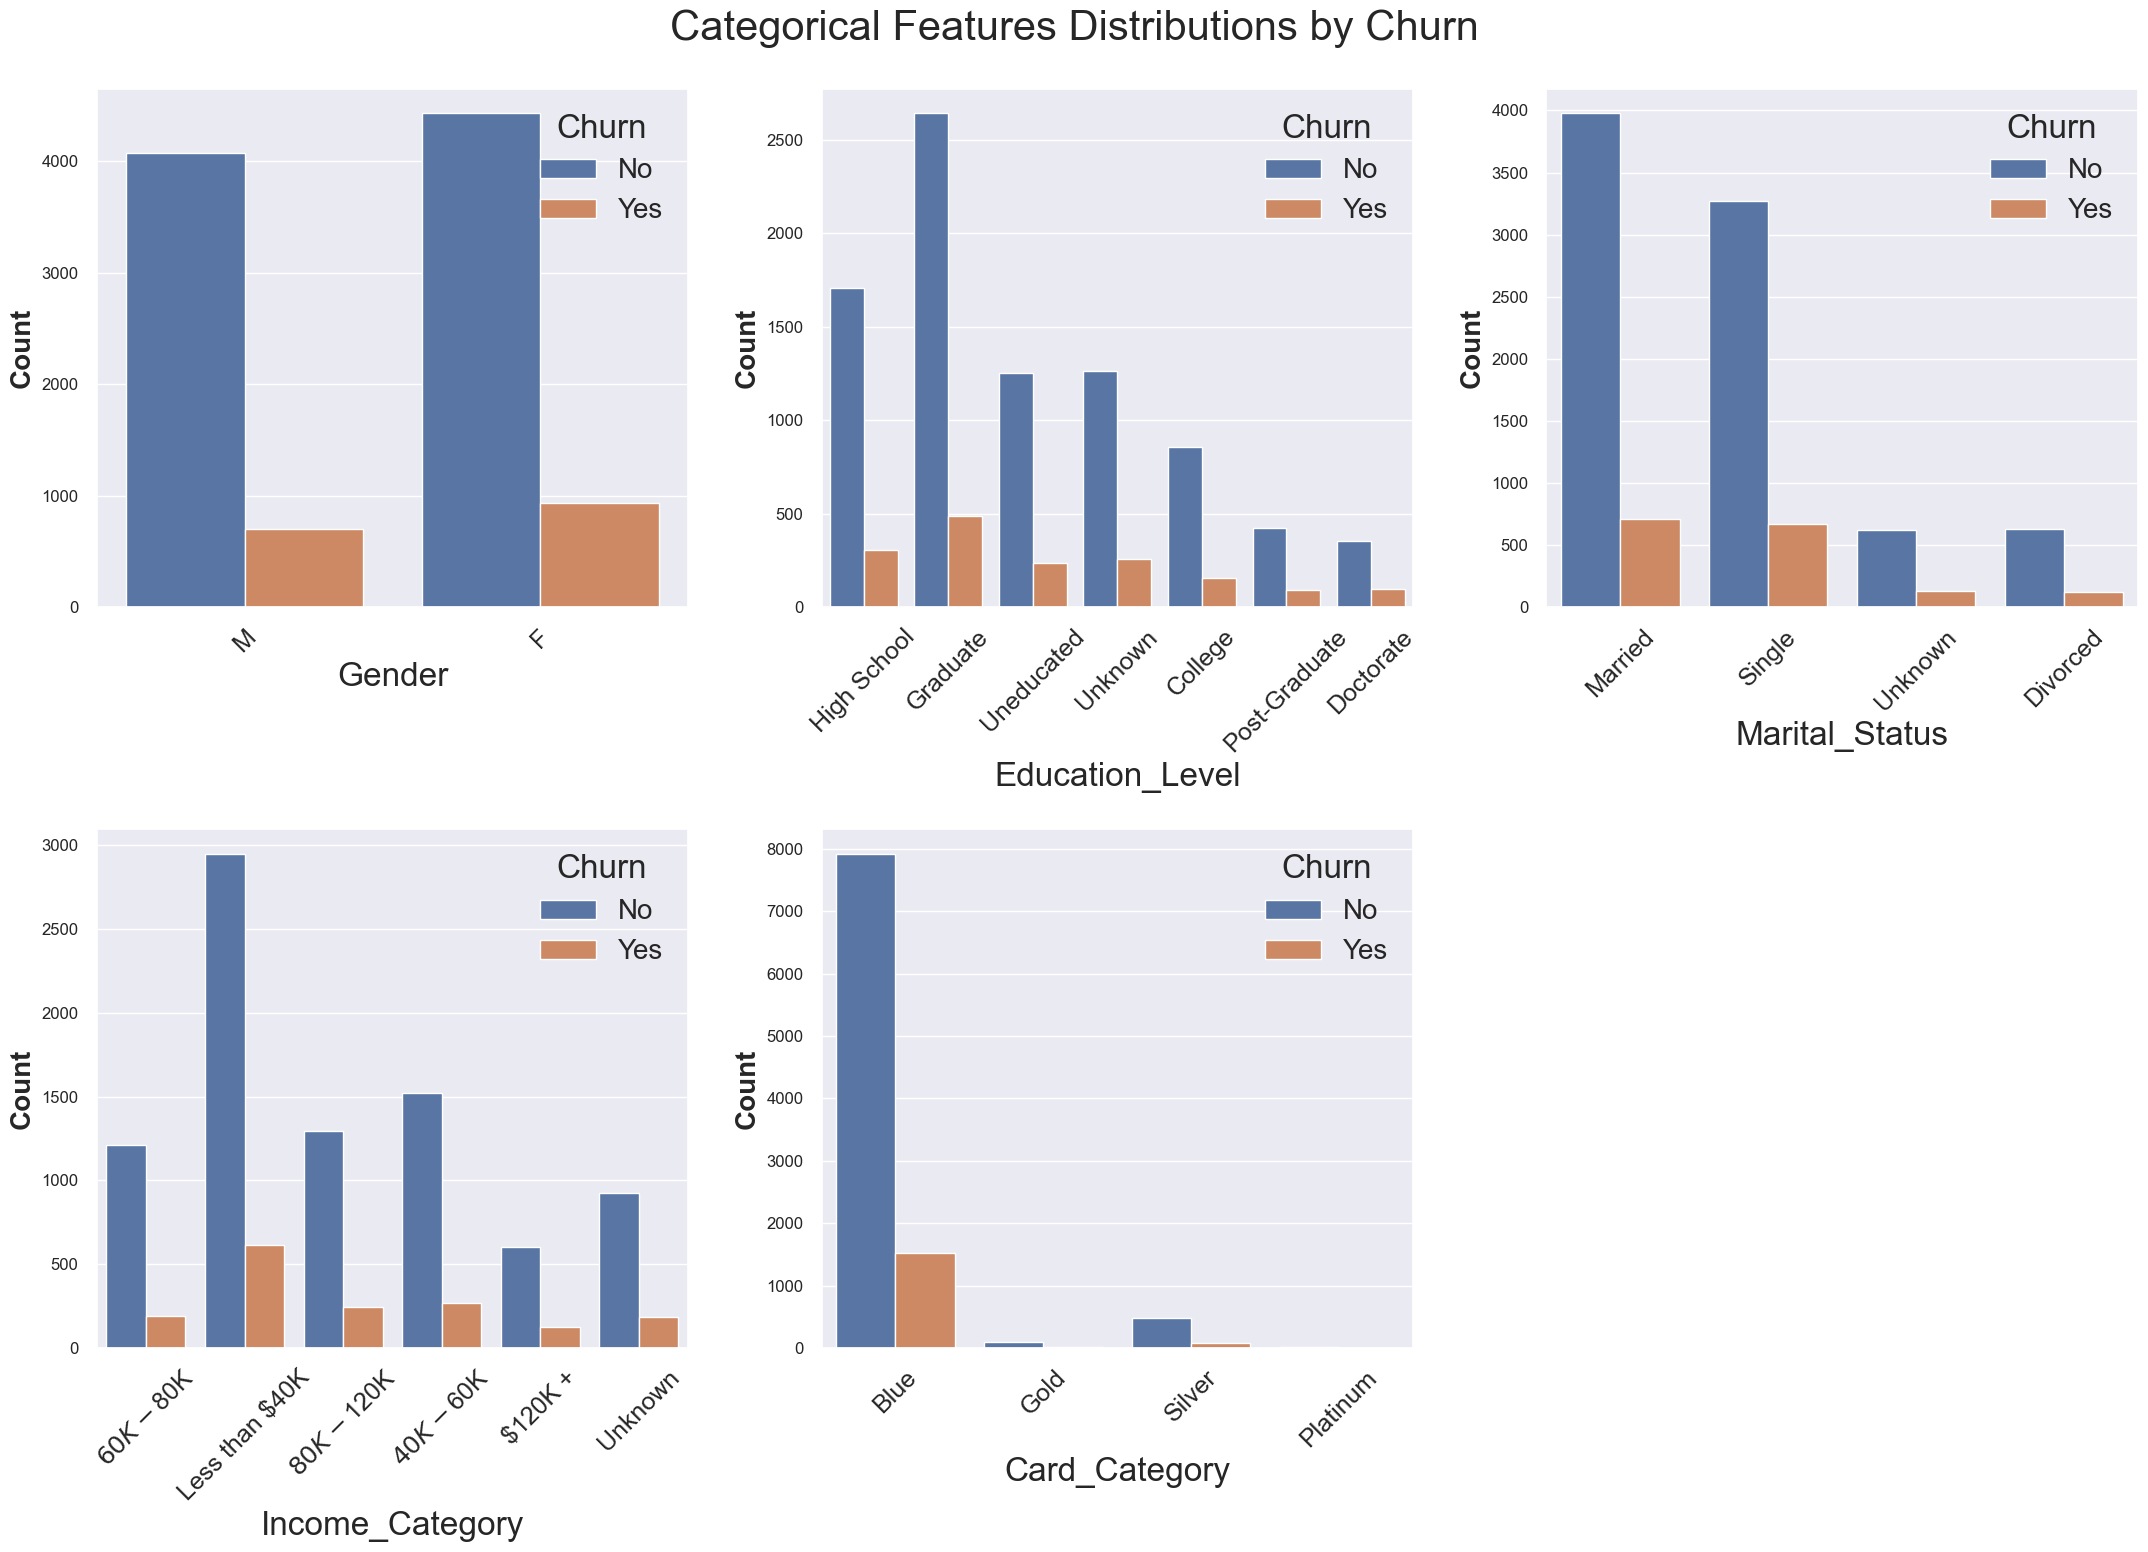

In [74]:
countplot_churn(cat_cols, df)

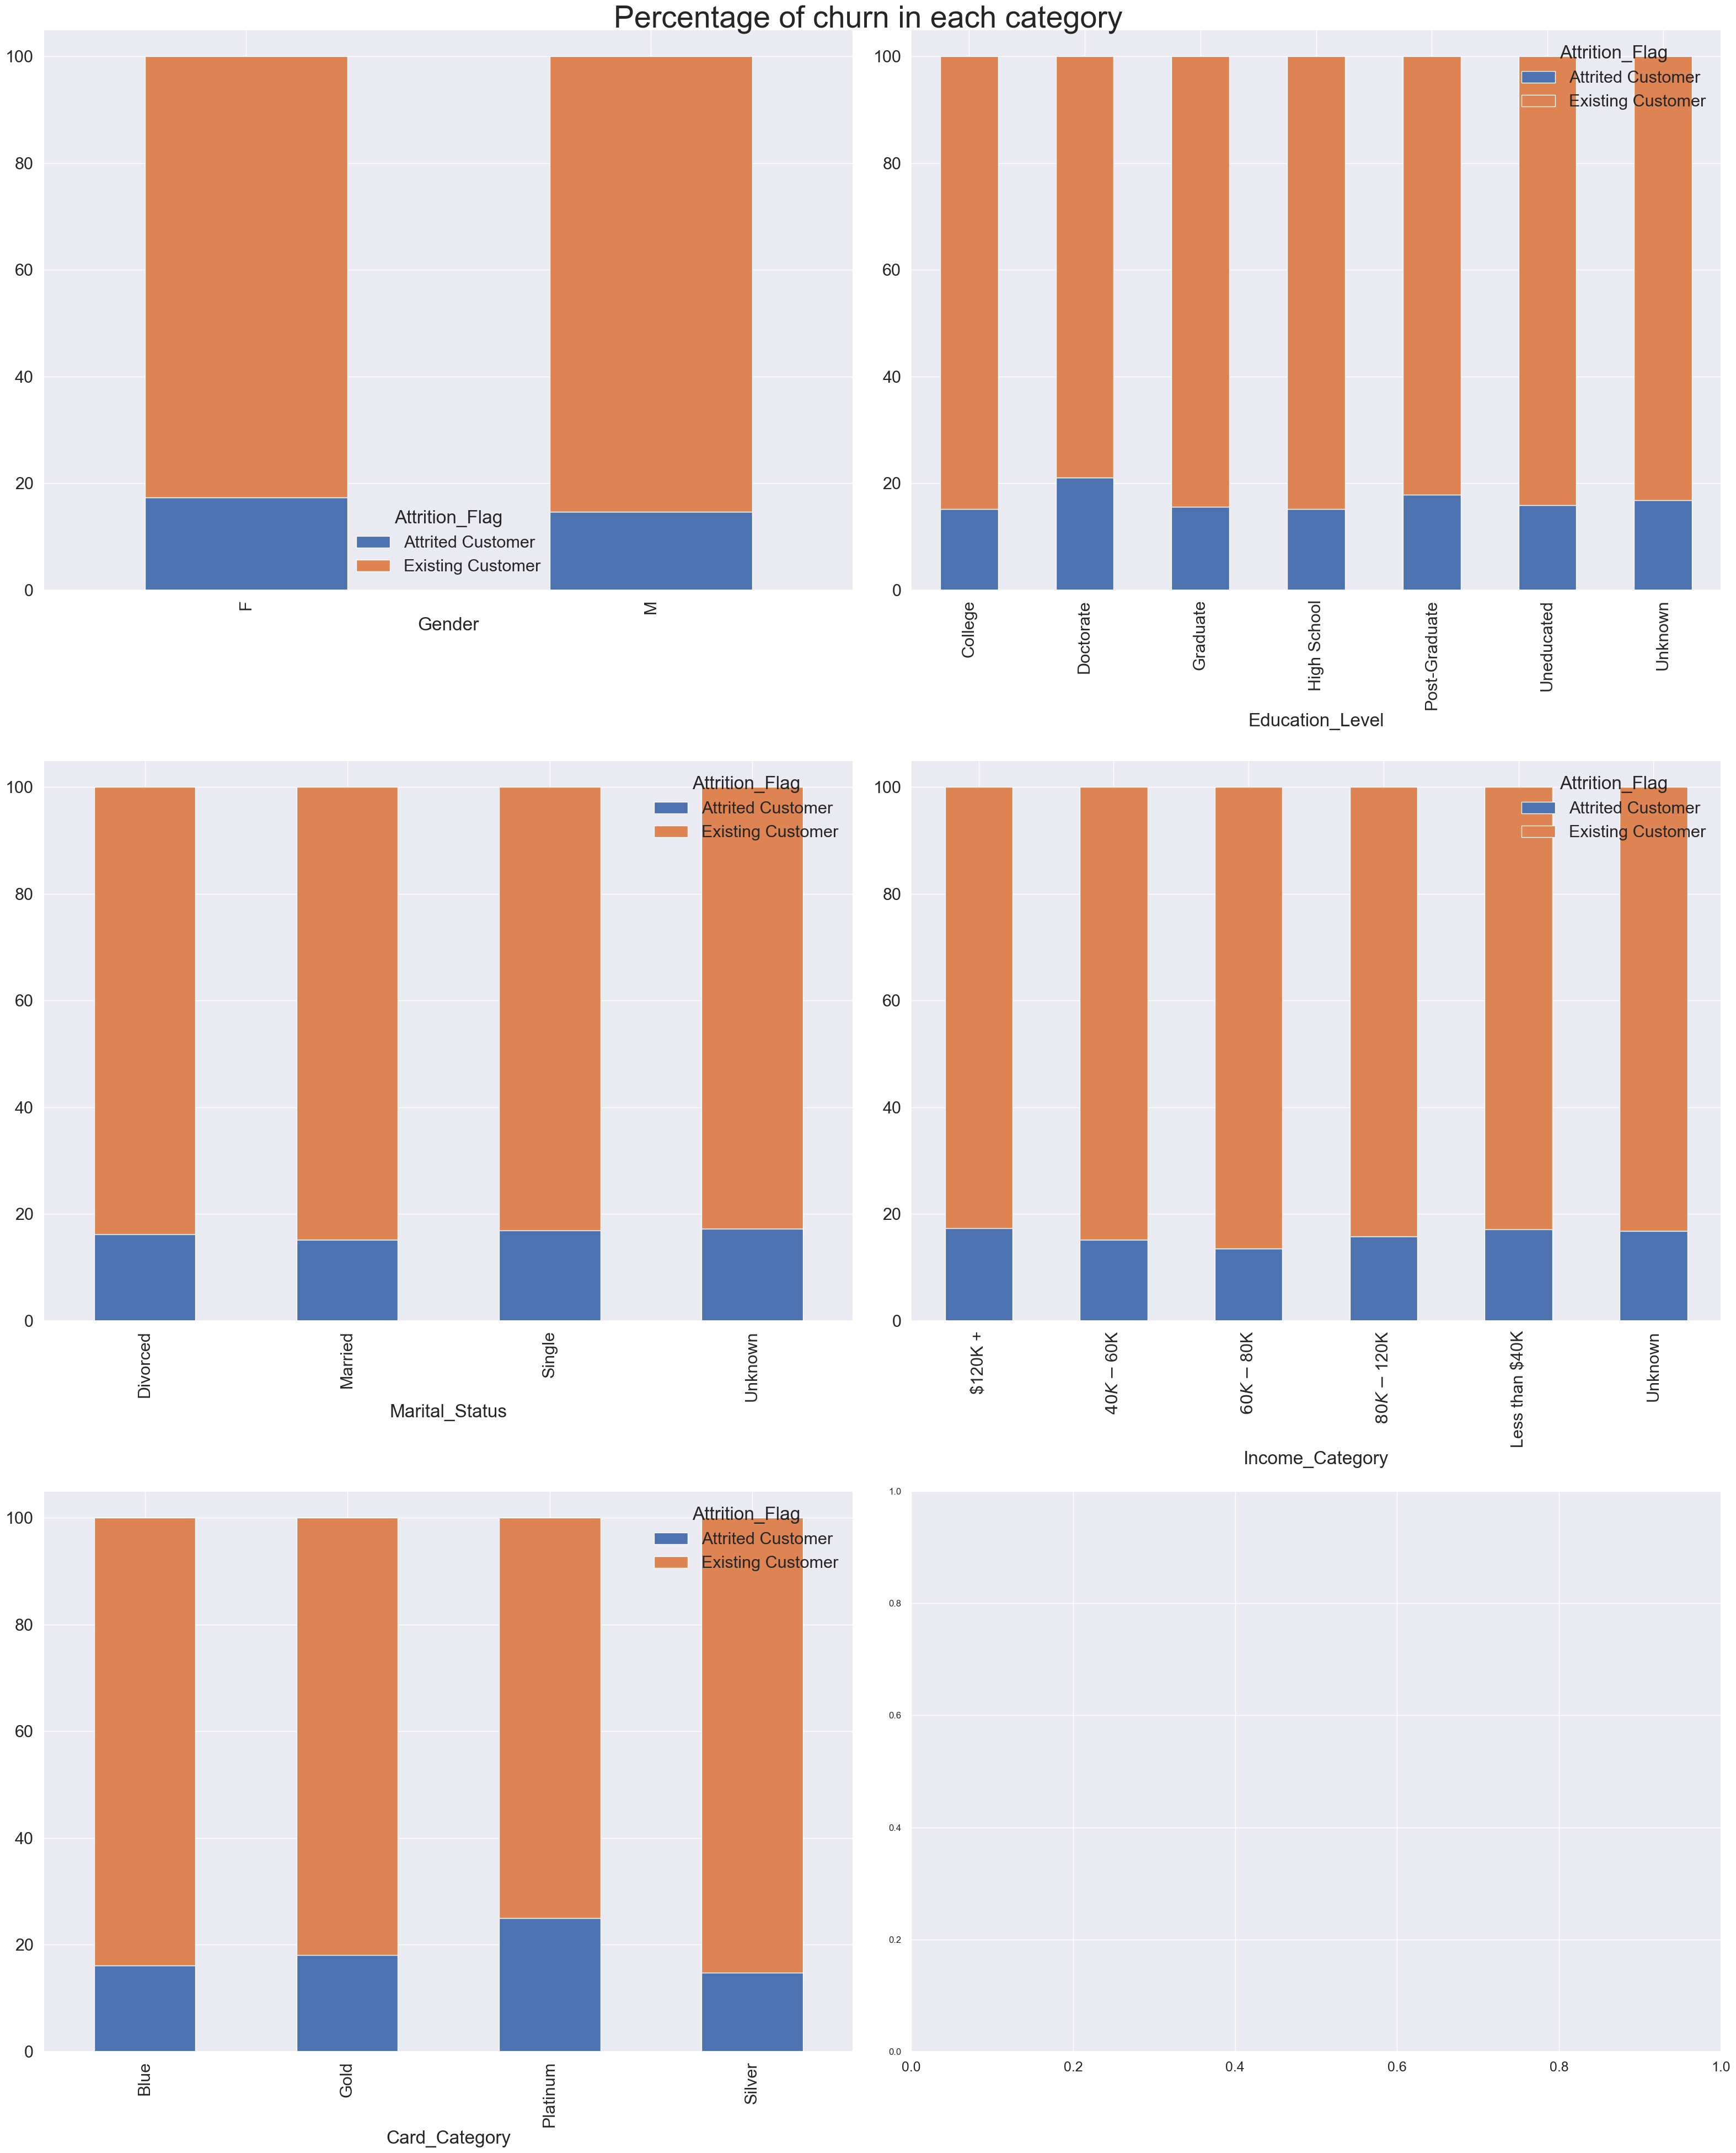

In [79]:
# Plot crosstab percentages across the categorical columns based on Attrition_Flag values
# n = len(categorical_cols)
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(32, 40) )
fig.suptitle('Percentage of churn in each category', fontsize=40)
# sns.set(font_scale=2) 
(pd.crosstab(df[cat_cols[0]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[0][0])
(pd.crosstab(df[cat_cols[1]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[0][1])
(pd.crosstab(df[cat_cols[2]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[1][0])
(pd.crosstab(df[cat_cols[3]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[1][1])
(pd.crosstab(df[cat_cols[4]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[2][0])

# plt.ylabel("Percentage Active/Inactive %")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=12)

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=12)
plt.tight_layout()

**Summary: all categorical features NOT likely contribute significantly to churn**

- Churn rate is slightly higher in female customers

- Churn rate is slightly higher for customers with doctorate education. Doctorate category contains the least number of customers.

- Churn rate is higher for customers with Platinum Card. But there are only a few customers with Platinum Card.    

#### Check the numerical columns

In [58]:
num_cols = df.select_dtypes(['int64','float64']).columns.to_list()
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [81]:
df[num_cols].describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [84]:
# for fontsize in sns
# sns.set_context("notebook", font_scale=1)

In [95]:
# # check data distribution
# fig = plt.figure(figsize=(10, 12))
# # fig.subplots_adjust(hspace=0.8, wspace=0.8)
# for i,var in enumerate(num_cols):
#     ax = fig.add_subplot(7, 2, i+1)
#     ax.hist(df[var])
#     ax.set_title(var)  
# plt.tight_layout()

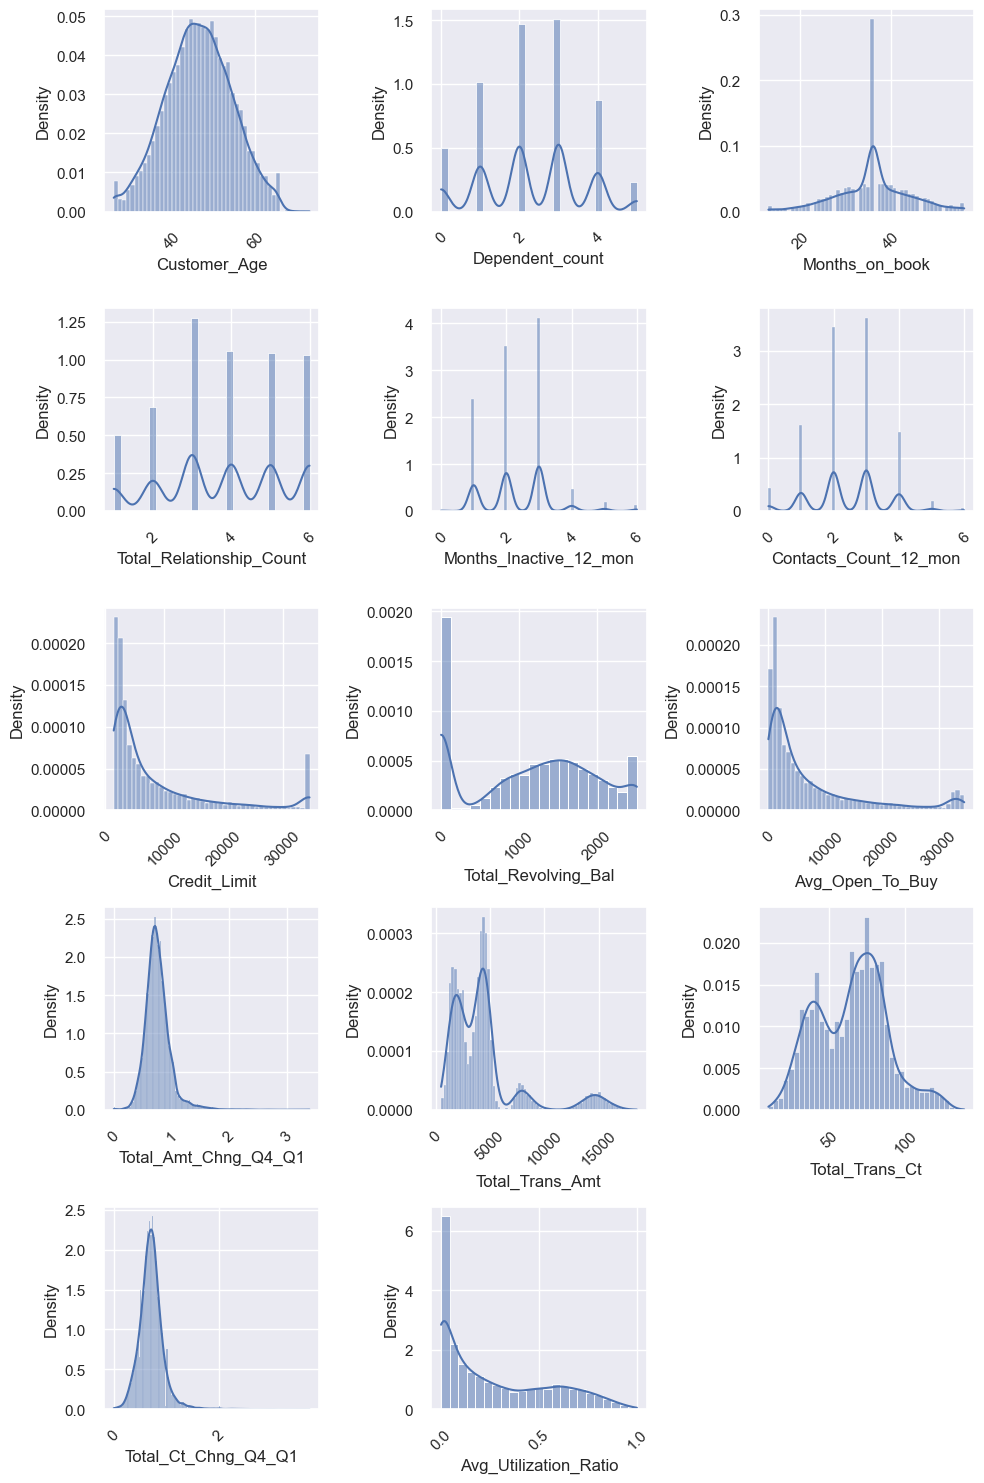

In [94]:
# check data distribution
fig = plt.figure(figsize=(10,15))
# fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(num_cols):
    ax = fig.add_subplot(5, 3, i+1)
    sns.histplot(df[var], kde=True, stat='density',ax=ax)
    ax.tick_params(axis='x', rotation=45)
#     ax.set_title(var)
plt.tight_layout()

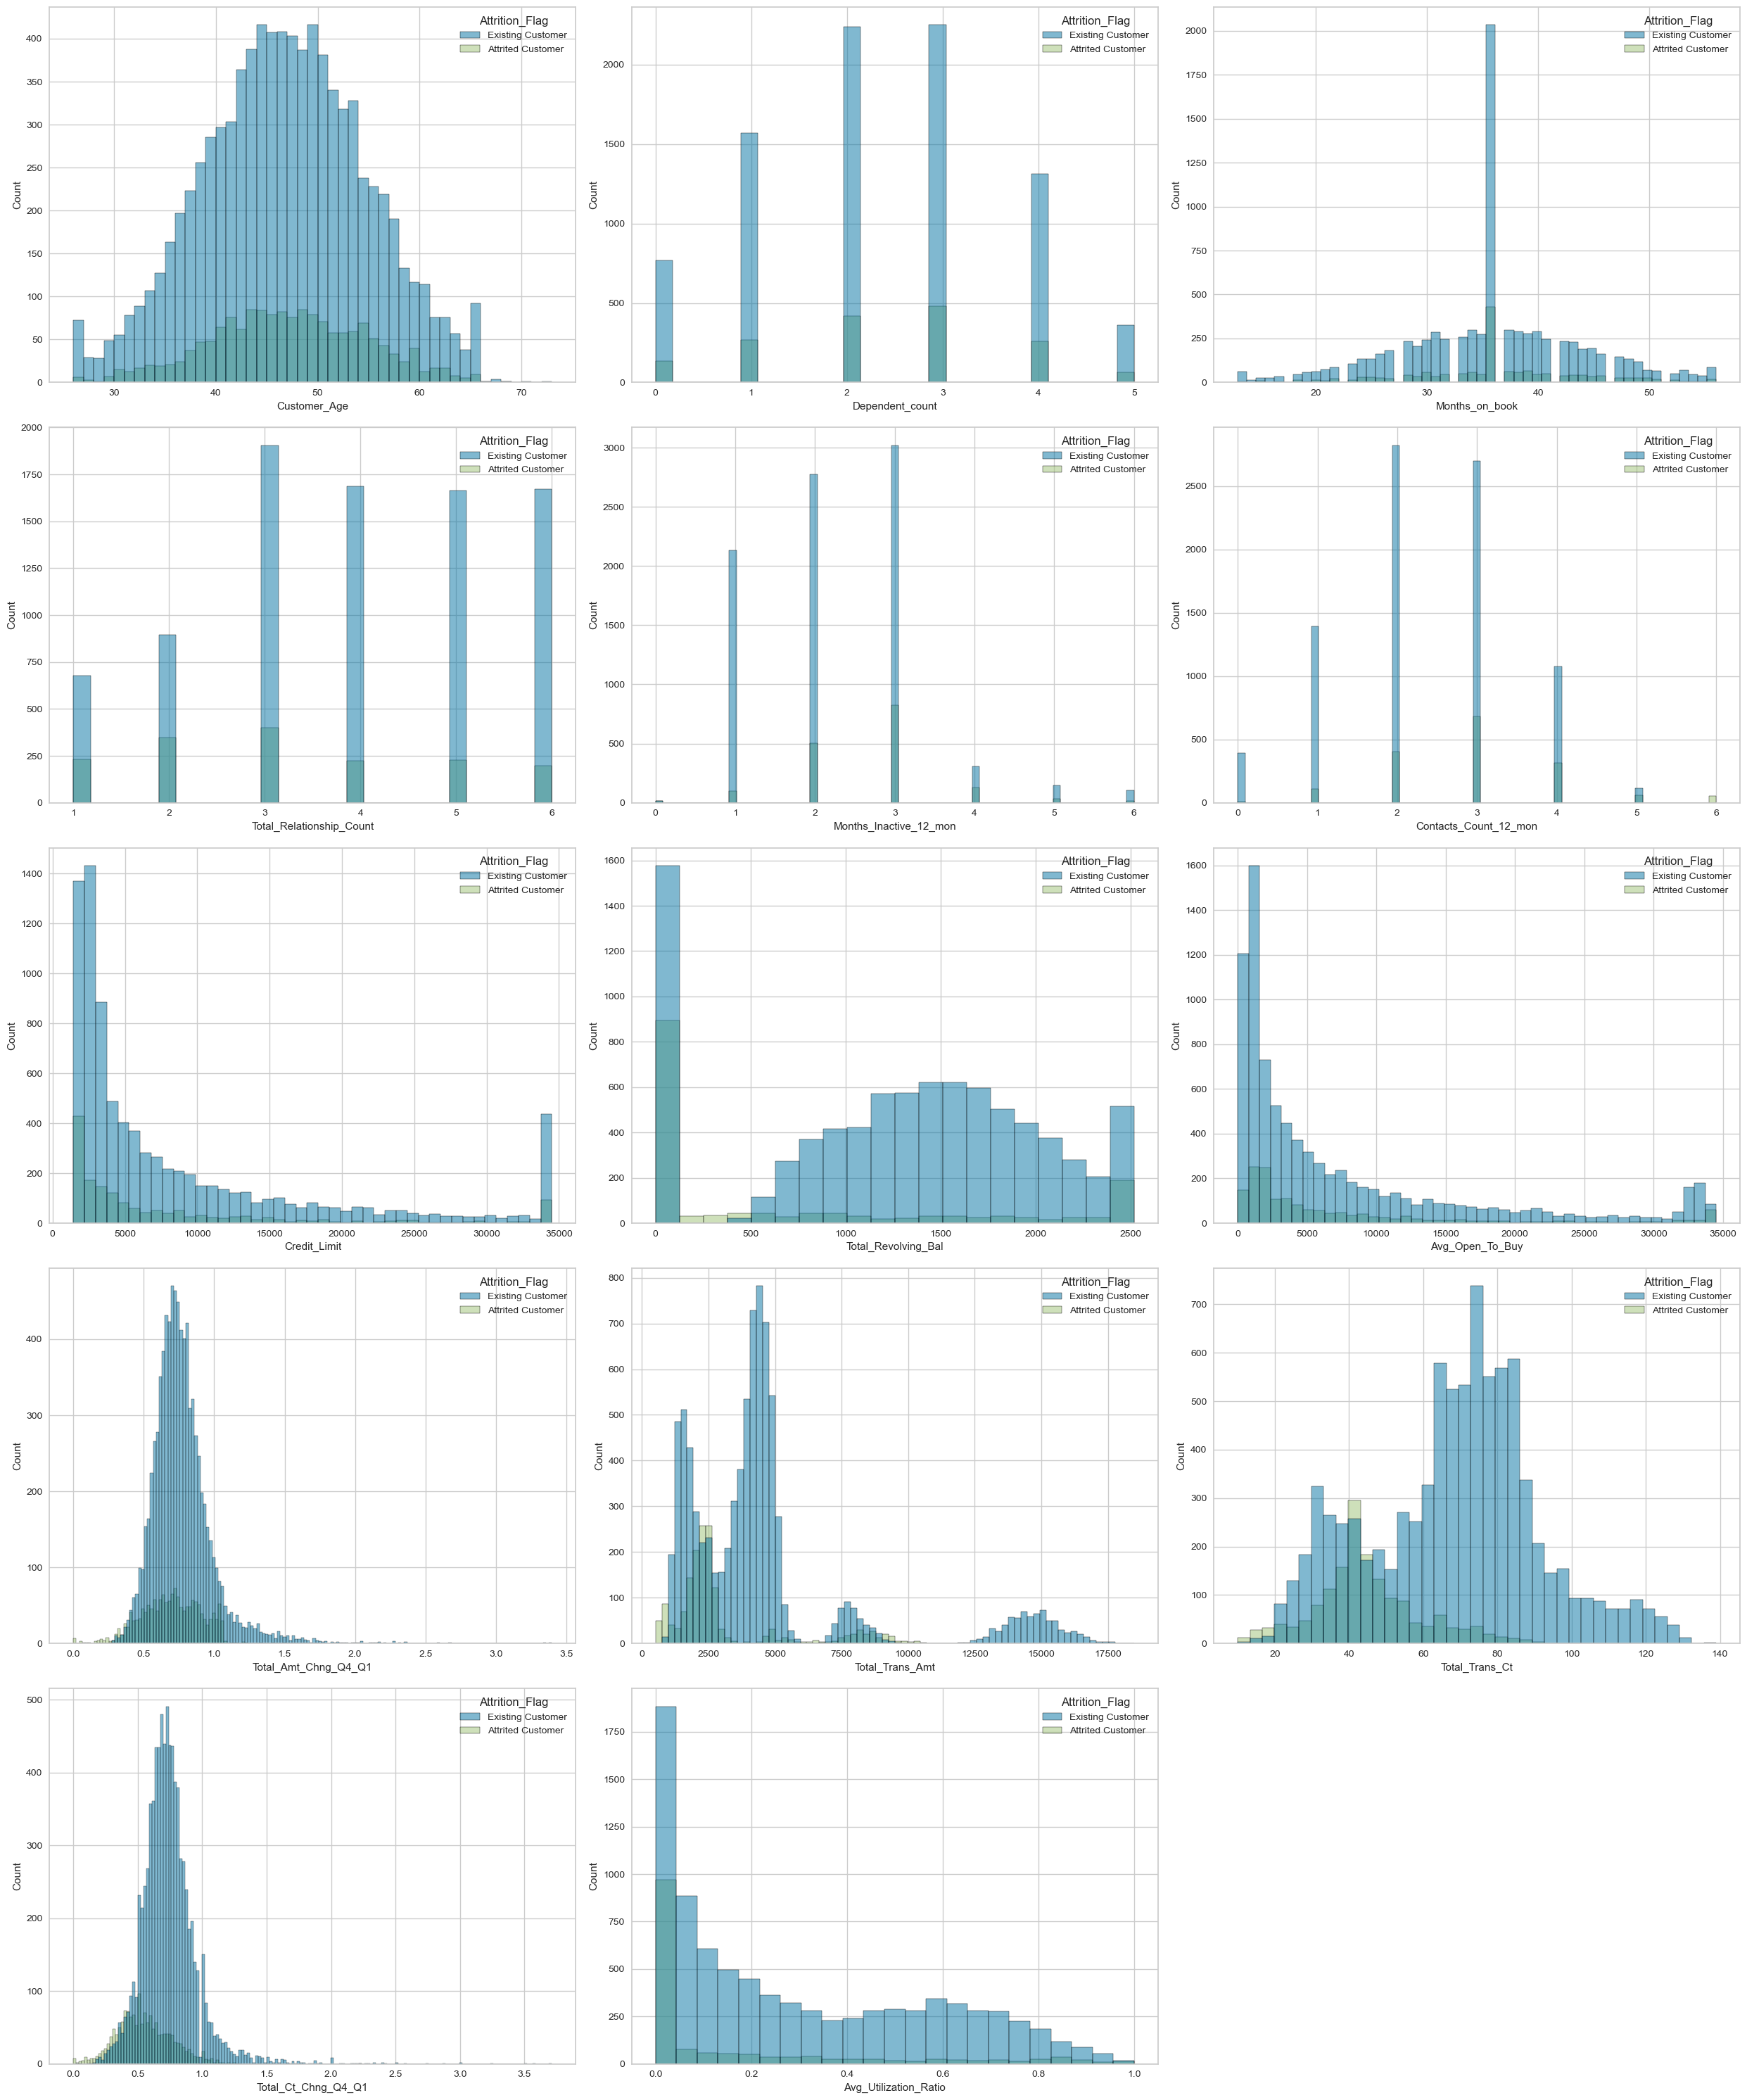

In [21]:
# churn distribution in num_cols
plt.figure(figsize=(25, 30))
for i in range(len(num_cols)):
    plt.subplot(5, 3, i+1)
#     plt.hist(df[num_cols[i]], density=True)
    sns.histplot(data=df, x=num_cols[i], hue='Attrition_Flag')
    plt.xlabel(num_cols[i])


plt.tight_layout()

In [97]:
df[num_cols].skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

df.skew(): If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer.

**Data is skewed in some numerical columns**

**Check how these features correlate with churn rate**

In [98]:
# # churn distribution in num_cols
# plt.figure(figsize=(25, 30))
# for i in range(len(num_cols)):
#     plt.subplot(5, 3, i+1)
# #     plt.hist(df[num_cols[i]], density=True)
#     sns.histplot(data=df, x=num_cols[i], hue='Attrition_Flag')
#     plt.xlabel(num_cols[i])


# plt.tight_layout()

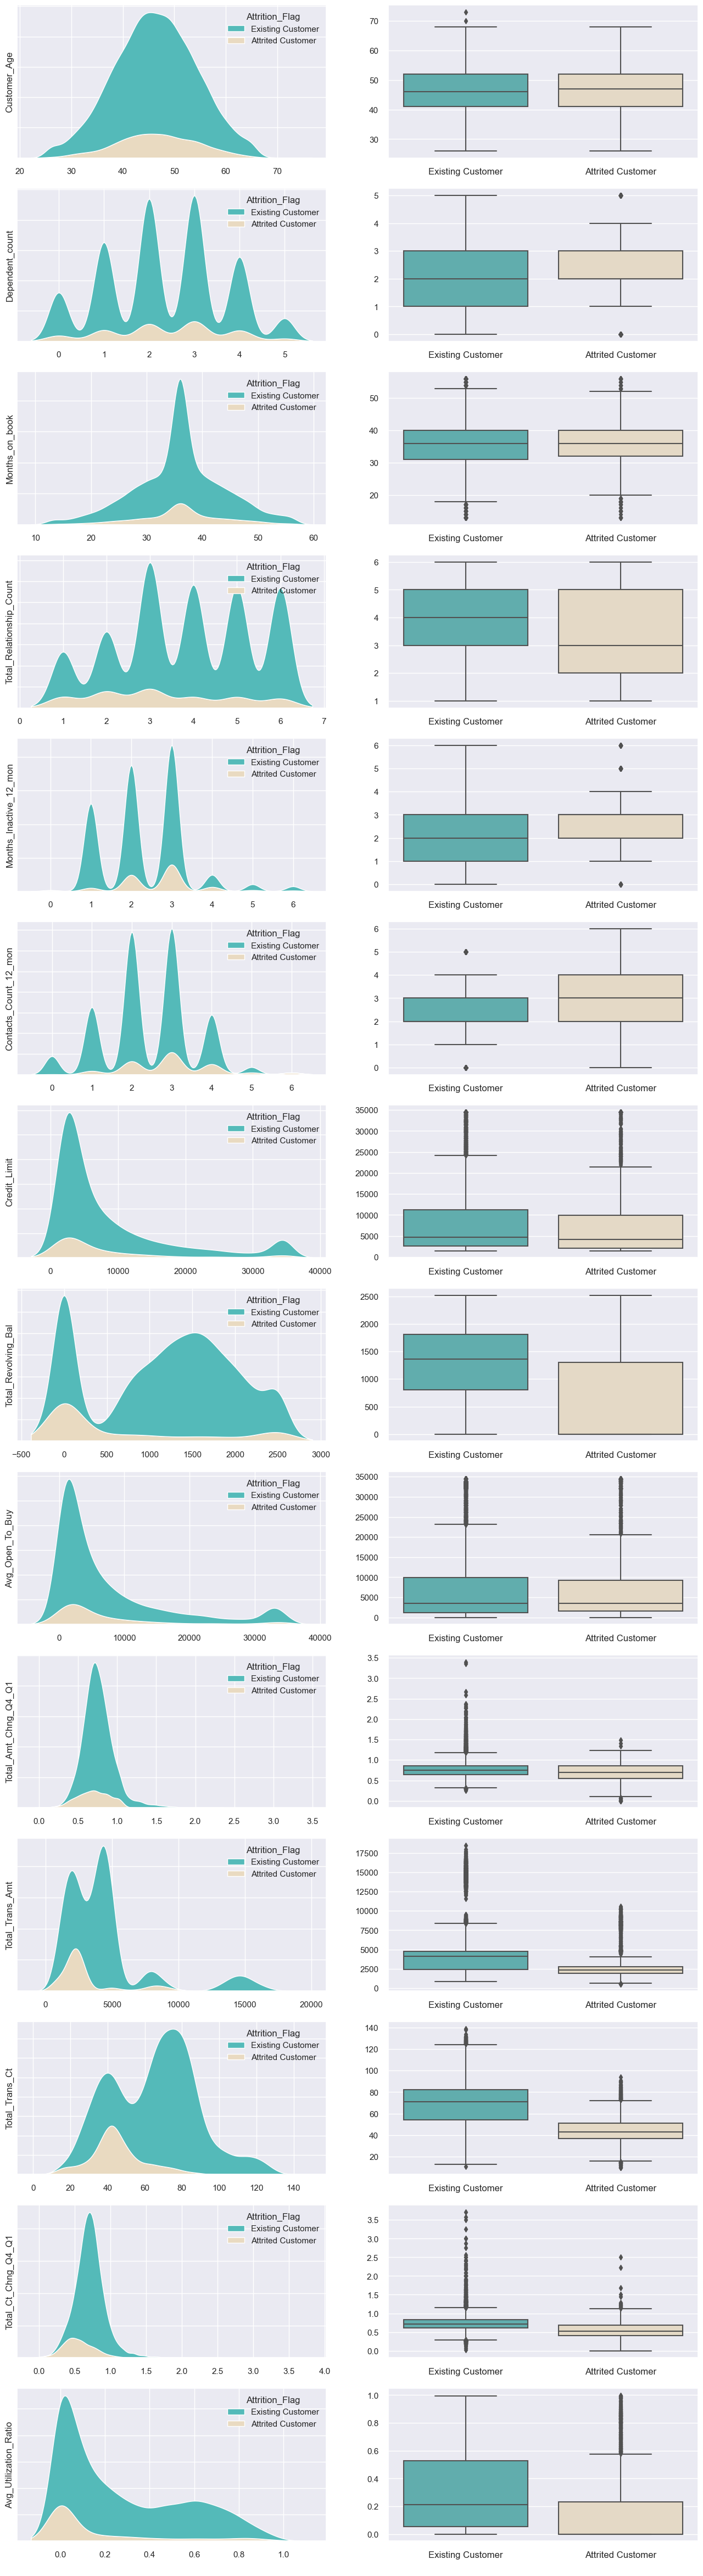

In [106]:
fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 60))                
i = 0 #counter
for cols in num_cols:    
#     Removing Outliers     
#     Q3 = df[cols].quantile(0.99)
#     df = df[df[cols] <= Q3]
#     Q1 = df[cols].quantile(0.01)
#     df = df[df[cols] >= Q1]    
    sns.kdeplot(data= df, x=df[cols], fill=True, alpha=1, hue = 'Attrition_Flag', 
                palette=('#54BAB9', '#E9DAC1'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=('#54BAB9', '#E9DAC1'), color='white')
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=12)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=12)
    i=i+1      
plt.show()

**Features likely contribute to churn (data distribute differently between existing and churned customer:**
- Total_Relationship_Count
- Total_Revolving_Bal
- Total_Trans_Amt
- Total_Trans_Ct
- Avg_Utilization_Ratio
- Total_Amt_Chng_Q4_Q1
- Total_Ct_Chng_Q4_Q1
    
**Features NOT likely contribute to churn (data distribute similarly between existing and churned customer:**
- Customer_Age
- Dependent_count
- Months_on_book
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Avg_Open_To_Buy    

### Multivariate analysis
Purpose is to check correlations between features to find out if we have collinearity or multicollinearity between features. Chat-GPT claims collinearity is detrimental for all machine learning models including linear model, tree-based calssifiers and even KMeans clustering.

#### Pearson correlation between numerical features

Text(0.5, 1.0, 'Pearson correlation Results')

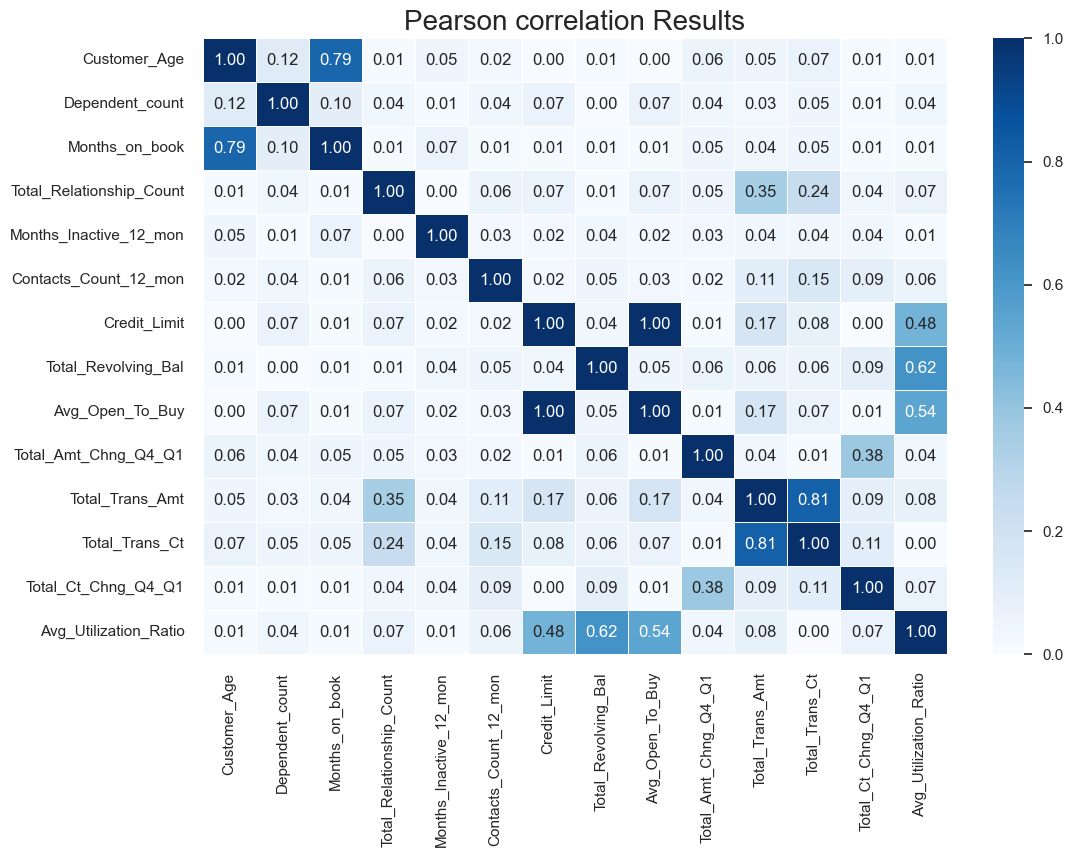

In [107]:
# Pearson correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(abs(round(df.corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
            annot=True, 
            fmt='.2f')
plt.title('Pearson correlation Results', fontsize=20)

Text(0.5, 1.0, 'Spearman correlation Results')

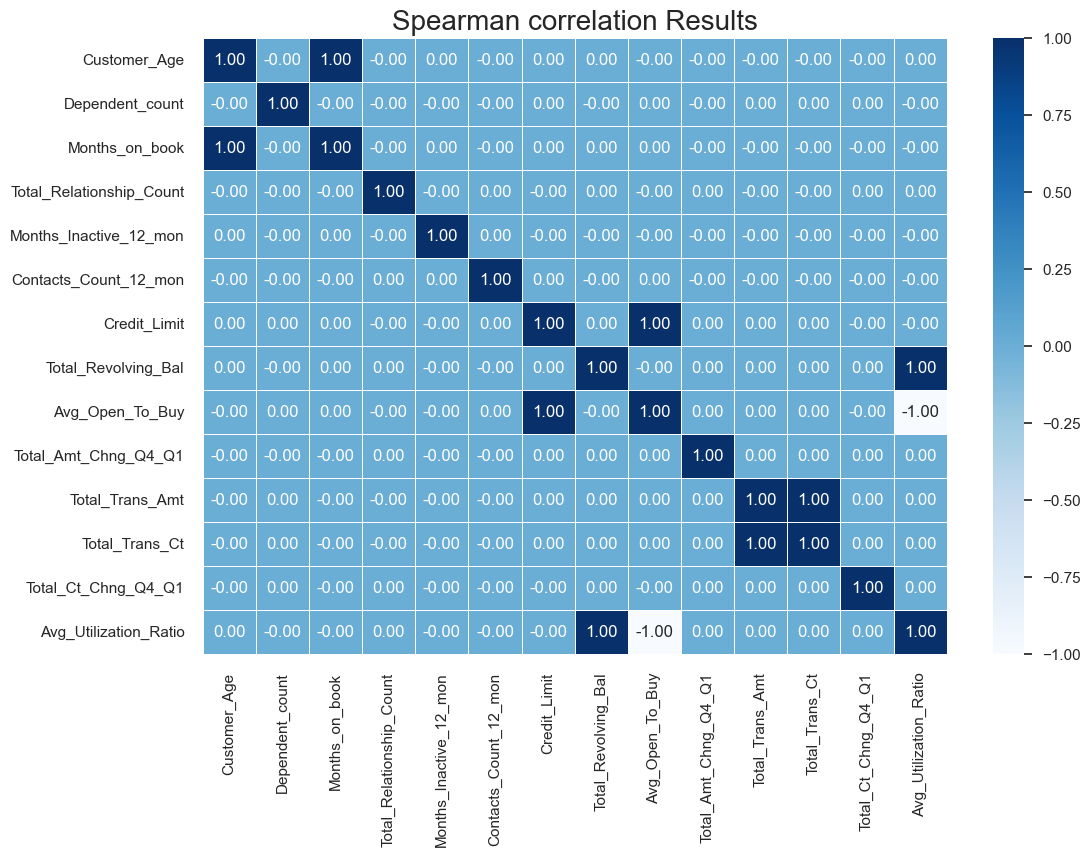

In [108]:
# Spearman correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr('spearman')),
#     abs(round(df.corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
            annot=True, 
            fmt='.2f')
plt.title('Spearman correlation Results', fontsize=20)

In [110]:
# # Kendall correlation 
# plt.figure(figsize=(12,8))
# sns.heatmap(round(df.corr('kendall'),2),
# #     abs(round(df.corr(),2)), 
# #             vmin=-1.0, 
# #             vmax=1.0, 
#             linewidths=0.5, 
#             cmap='Blues', 
#             annot=True, 
#             fmt='.2f')
# plt.title('Kendall correlation Results', fontsize=20)

**Insights from Pearson and Spearman correlation analysis of numerical features:**
- **Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy**
- **Avg_Utilization_Ratio = Total_Revolving_Bal  / credit limit**
- **Usually Total_Revolving_Bal is much smaller than Avg_Open_To_Buy. Thus Credit_Limit is close to Avg_Open_To_Buy in most columns. Correlation is 1.0 between them. We can drop Avg_Open_To_Buy column**
- **Customer_age correlates well with Months_On_Book (0.79)**
- **Total_Trans_Ct also well correlates with Total_Trans_Amt (0.81). This is also understandable.** 
- **Also correlates well are Total_Revolving_Bal and Ave_Utlization_Ratio.**

**Possible feature engineering with numerical features:**
- <span style="color:red">We should drop Avg_Open_To_Buy. Correlation is too strong.
- <span style="color:red">We can consider either drop one of these two olumns: Total_Trans_Amt and Total_Trans_Ct or, we can generate a new column Ave_Purchase_Price = Total_Trans_Amt / Total_Trans_Ct, since Total_Trans_Ct correlates well with Total_Trans_Amt (0.81). Not sure which way is better. Or we can use feature selection to see if we can eliminate one of them later?
- <span style="color:red"> Customer_age correlates well with Months_On_Book (0.79). Maybe we can also drop one of them. For example, drop Customer_age.  
- <span style="color:red">We will also perform phiK analysis on all columns and get an estimate how numerical features correlate with target (churn). 

#### VIF
To calculate the variance inflation factor (VIF) using Python, you can use the vif function from the statsmodels library. The vif function takes a fitted linear model, such as a linear regression, and a specific independent variable and returns the VIF score for that variable. 

In [114]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [117]:
X_vif = pd.DataFrame(sd.fit_transform(df[num_cols]), columns=[num_cols])
y_vif = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [118]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# fit a linear regression model
model = sm.OLS(y_vif, X_vif).fit()

# calculate the VIF for all independent variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns

print(vif)

    VIF Factor                     features
0     2.675596              (Customer_Age,)
1     1.028368           (Dependent_count,)
2     2.658376            (Months_on_book,)
3     1.155622  (Total_Relationship_Count,)
4     1.011255    (Months_Inactive_12_mon,)
5     1.037201     (Contacts_Count_12_mon,)
6          inf              (Credit_Limit,)
7          inf       (Total_Revolving_Bal,)
8          inf           (Avg_Open_To_Buy,)
9     1.192111      (Total_Amt_Chng_Q4_Q1,)
10    3.263320           (Total_Trans_Amt,)
11    3.024481            (Total_Trans_Ct,)
12    1.208277       (Total_Ct_Chng_Q4_Q1,)
13    2.900014     (Avg_Utilization_Ratio,)


**Insights from Pearson and Spearman correlation analysis of numerical features:**
- **Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy**
- **Avg_Utilization_Ratio = Total_Revolving_Bal  / credit limit**
- **Usually Total_Revolving_Bal is much smaller than Avg_Open_To_Buy. Thus Credit_Limit is close to Avg_Open_To_Buy in most columns. Correlation is 1.0 between them. We can drop Avg_Open_To_Buy column**
- **Customer_age correlates well with Months_On_Book (0.79)**
- **Total_Trans_Ct also well correlates with Total_Trans_Amt (0.81). This is also understandable.** 
- **Also correlates well are Total_Revolving_Bal and Ave_Utlization_Ratio.**

**Possible feature engineering with numerical features:**
- <span style="color:red">We should drop Avg_Open_To_Buy. Correlation is too strong.
- <span style="color:red">We can consider either drop one of these two olumns: Total_Trans_Amt and Total_Trans_Ct or, we can generate a new column Ave_Purchase_Price = Total_Trans_Amt / Total_Trans_Ct, since Total_Trans_Ct correlates well with Total_Trans_Amt (0.81). Not sure which way is better. Or we can use feature selection to see if we can eliminate one of them later?
- <span style="color:red"> Customer_age correlates well with Months_On_Book (0.79). Maybe we can also drop one of them. For example, drop Customer_age.  
- <span style="color:red">We will also perform phiK analysis on all columns and get an estimate how numerical features correlate with target (churn). 

#### phiK analysis between all columns (num + cat + churn)

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


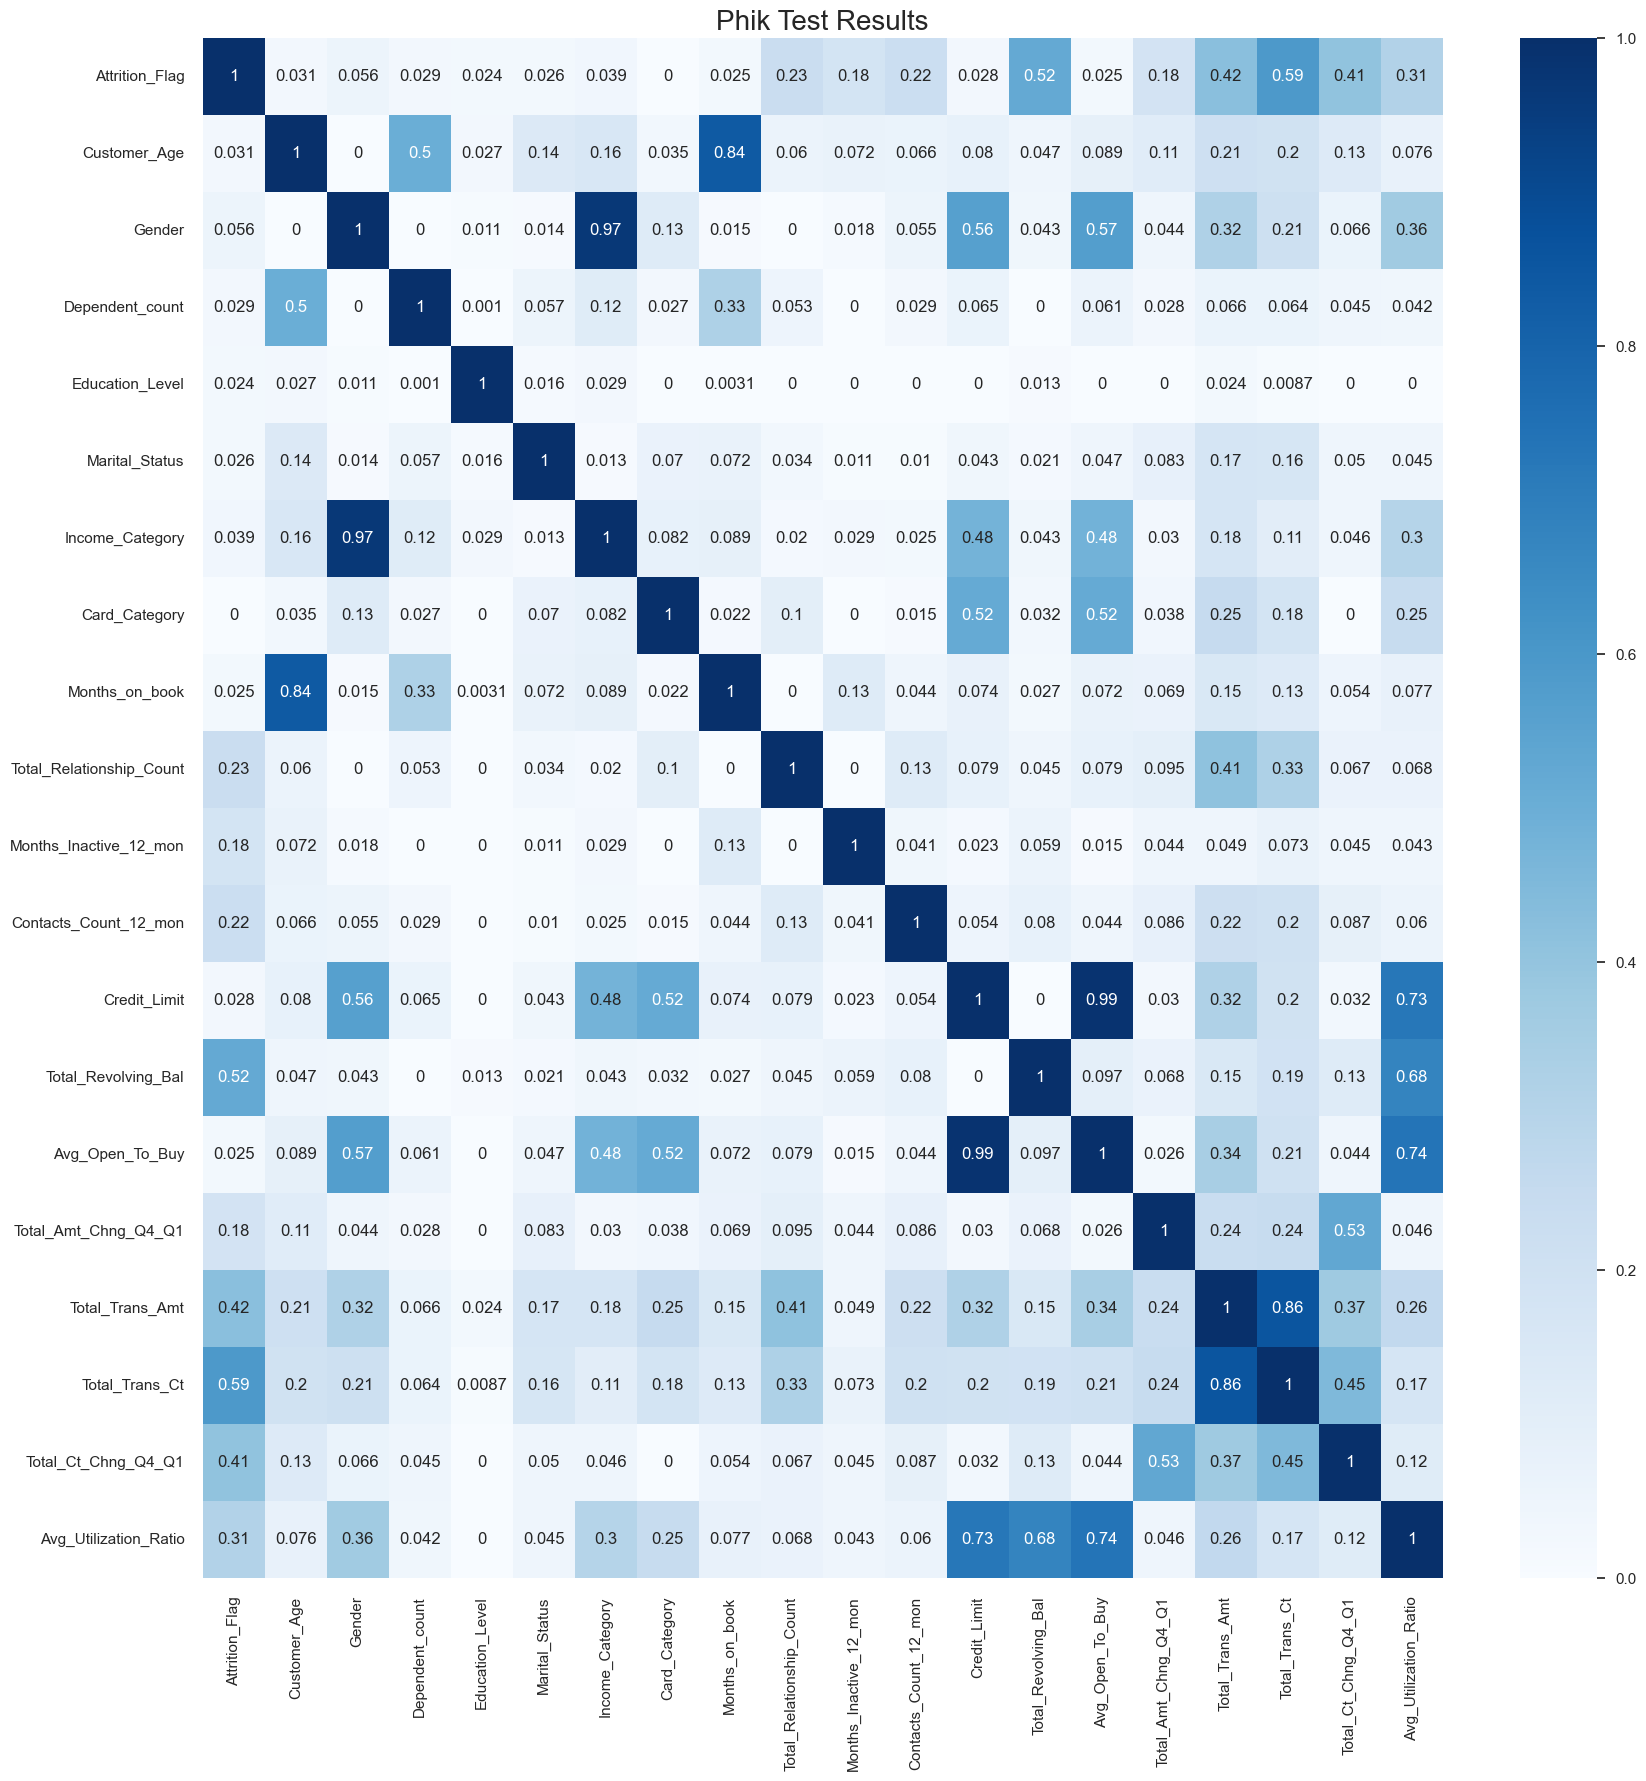

In [112]:
result = df.phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results', fontsize=20)
plt.show()

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


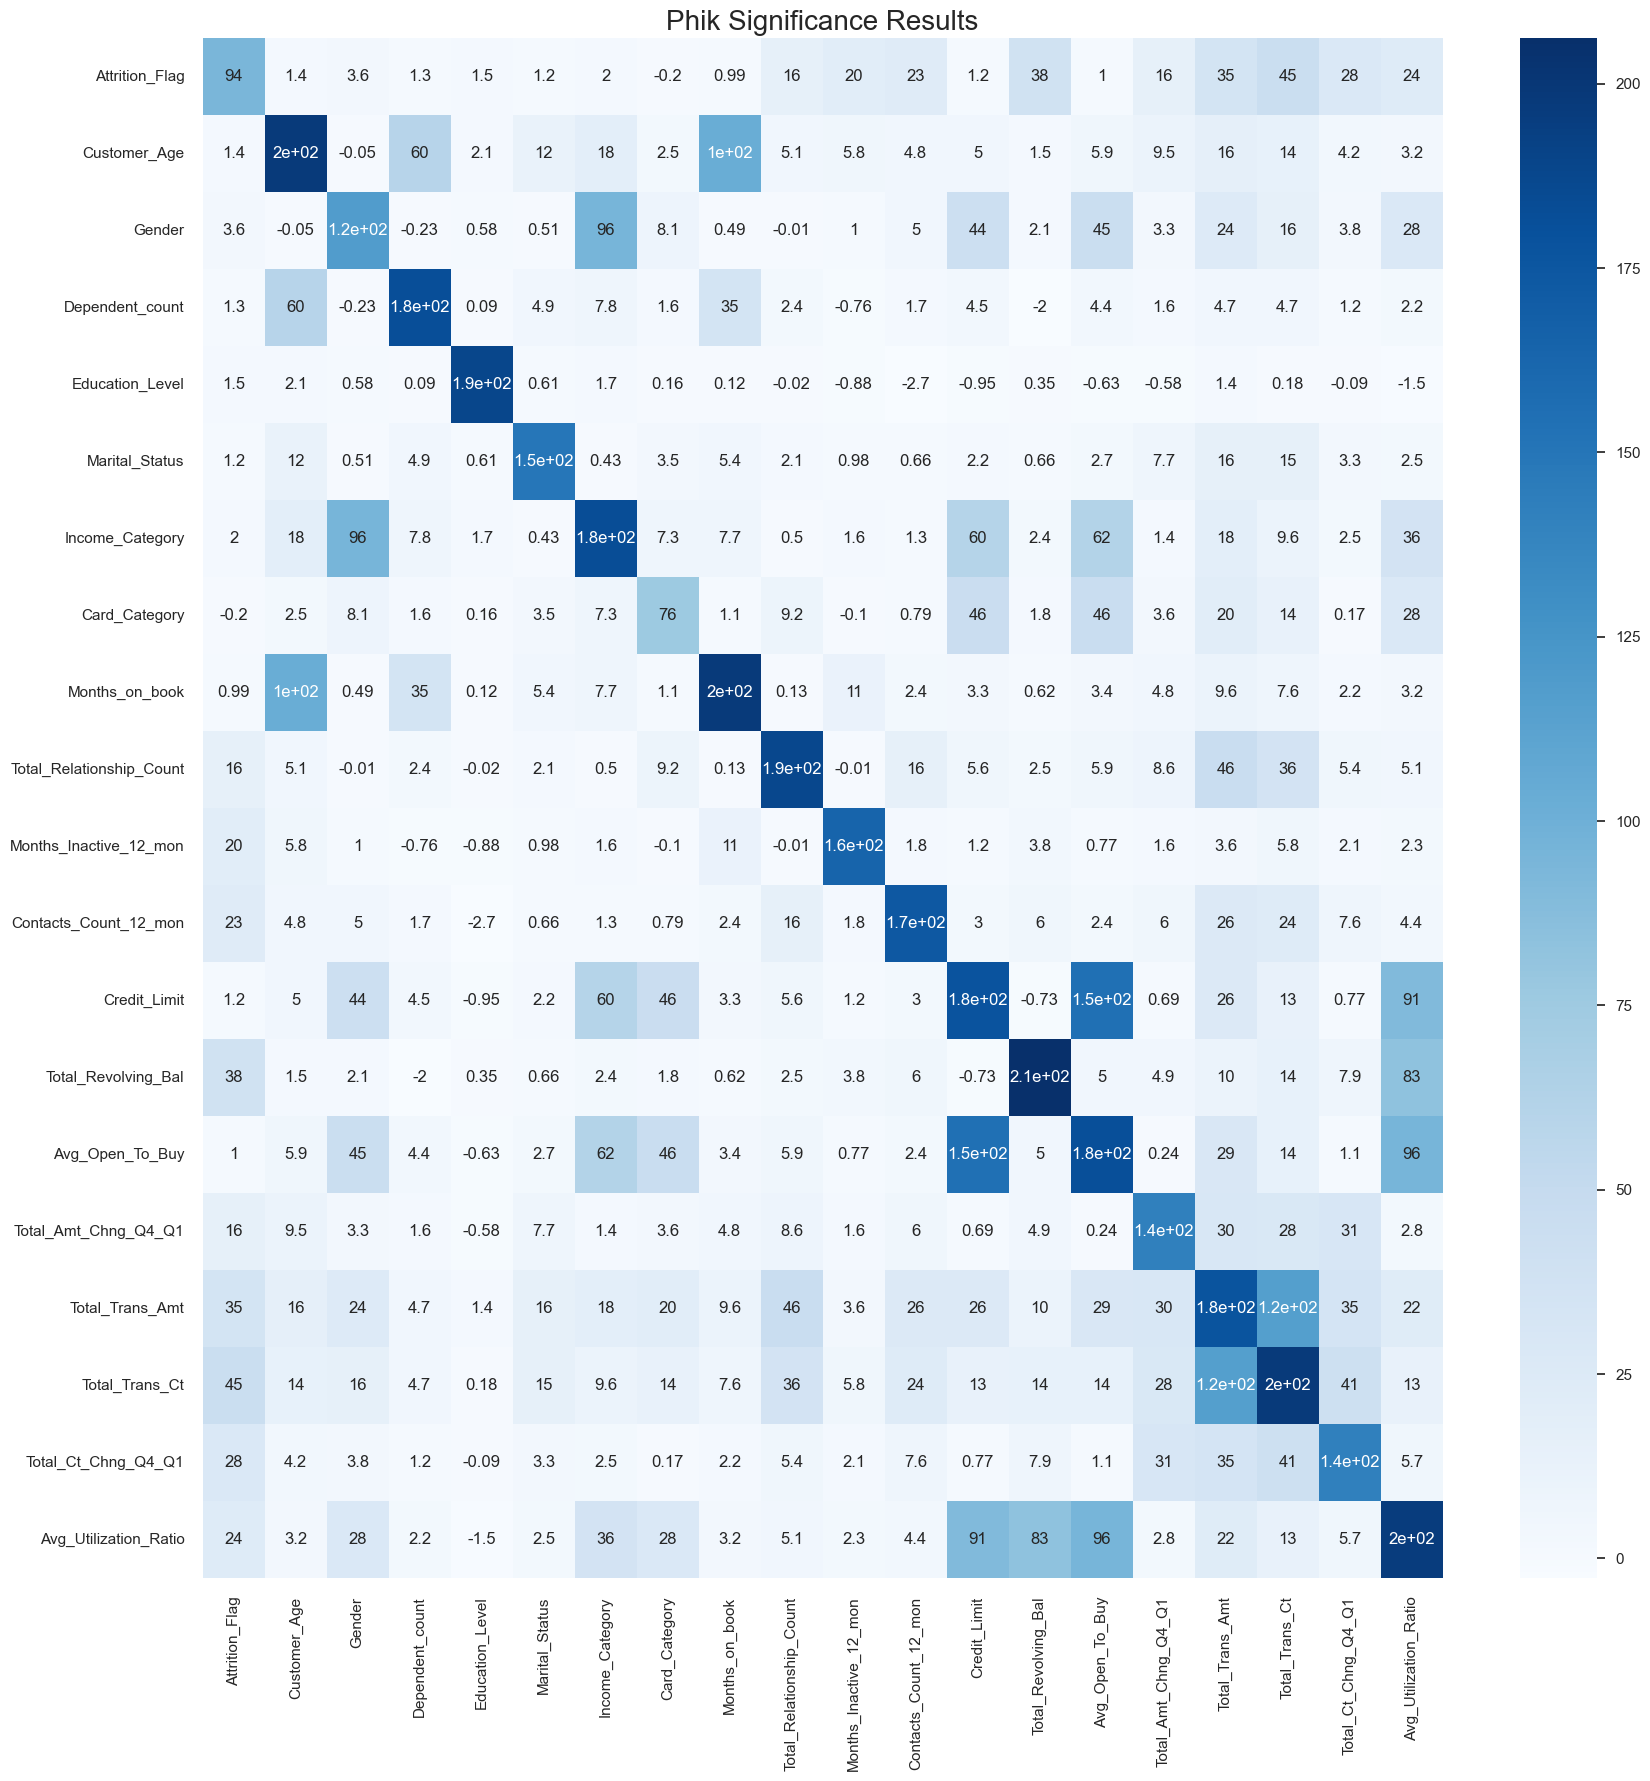

In [113]:
sig = df.significance_matrix()
fig = plt.figure(figsize=(20,20))
sns.heatmap(round(sig,2), annot=True, cmap='Blues')
plt.title('Phik Significance Results', fontsize=20)
plt.show()

**The high correlations of 3 pairs of features observed with Pearson's r are also shown in phiK analysis**
Besides those, 'Income_Category' and 'Gender' are highly correlated (phik 0.97). I will choose 'Income_Category' for clustering


In [25]:
num_cols = df.select_dtypes(exclude='O').columns


In [26]:
# power transform num_cols
# for col in num_cols:
#     print(col)
#     new_df[col] = PowerTransformer().fit_transform(new_df[col]).reshape(-1,1)
num_df = pd.DataFrame(PowerTransformer().fit_transform(df[num_cols]), columns=num_cols)

In [27]:
num_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.168365         0.516327        0.371128   
1          0.331118         1.979971        1.015094   
2          0.581381         0.516327       -0.009129   
3         -0.790608         1.255981       -0.259895   
4         -0.790608         0.516327       -1.827473   
...             ...              ...             ...   
10122      0.456207        -0.243470        0.498929   
10123     -0.666358        -0.243470       -1.357902   
10124     -0.293007        -1.031235       -0.009129   
10125     -2.026931        -0.243470       -0.009129   
10126     -0.417555        -0.243470       -1.357902   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.762305               -1.458324   
1                      1.417080               -1.458324   
2                      0.112803               -1.458324   
3                     -0.530415                1.525554   
4                      0.762305               -1.458324   
...                         ...                     ...   
10122                 -0.530415               -0.248057   
10123                  0.112803               -0.248057   
10124                  0.762305                0.714011   
10125                  0.112803                0.714011   
10126                  1.417080               -0.248057   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.495883      0.962782            -0.003768   
1                  -0.406084      0.566512             0.076214   
2                  -2.246757     -0.416953            -1.666149   
3                  -1.318361     -0.456520             1.114008   
4                  -2.246757     -0.028788            -1.666149   
...                      ...           ...                  ...   
10122               0.495883     -0.221957             0.767051   
10123               0.495883     -0.142837             0.949320   
10124               1.390258      0.125939            -1.666149   
10125               0.495883      0.099350            -1.666149   
10126               1.390258      0.784312             0.828880   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.930320              2.259377        -1.820680       -0.964211   
1             0.554222              2.803534        -1.605685       -1.397079   
2            -0.041640              4.654269        -0.953314       -2.078301   
3            -1.128002              2.454134        -1.778915       -2.078301   
4             0.205257              4.056715        -2.440781       -1.649743   
...                ...                   ...              ...             ...   
10122        -0.392083             -0.172752         2.106055        2.074153   
10123        -0.413694              0.323340         1.364659        0.219191   
10124         0.311183              0.392583         1.579991       -0.160020   
10125         0.292647             -1.133495         1.306176       -0.074614   
10126         0.656910             -0.172752         1.580378       -0.117231   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                 3.016295              -0.768027  
1                 6.011005              -0.497366  
2                 4.359489              -1.201678  
3                 4.359489               1.484731  
4                 4.612643              -1.201678  
...                    ...                    ...  
10122             0.713993               0.894944  
10123            -0.027784               1.015444  
10124             0.557466              -1.201678  
10125             0.148673              -1.201678  
10126            -0.186940              -0.058996  

[10127 rows x 14 columns]

In [28]:
cat_cols = df.select_dtypes(include='O').columns
cat_df = df[cat_cols]

In [29]:
cat_df

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

In [31]:
new_df = pd.concat([cat_df, num_df], axis=1)
# save new_df to csv
new_df.to_csv('cat_powerTransed_num.csv', index=False)

Text(0.5, 1.0, 'Pearson correlation Results')

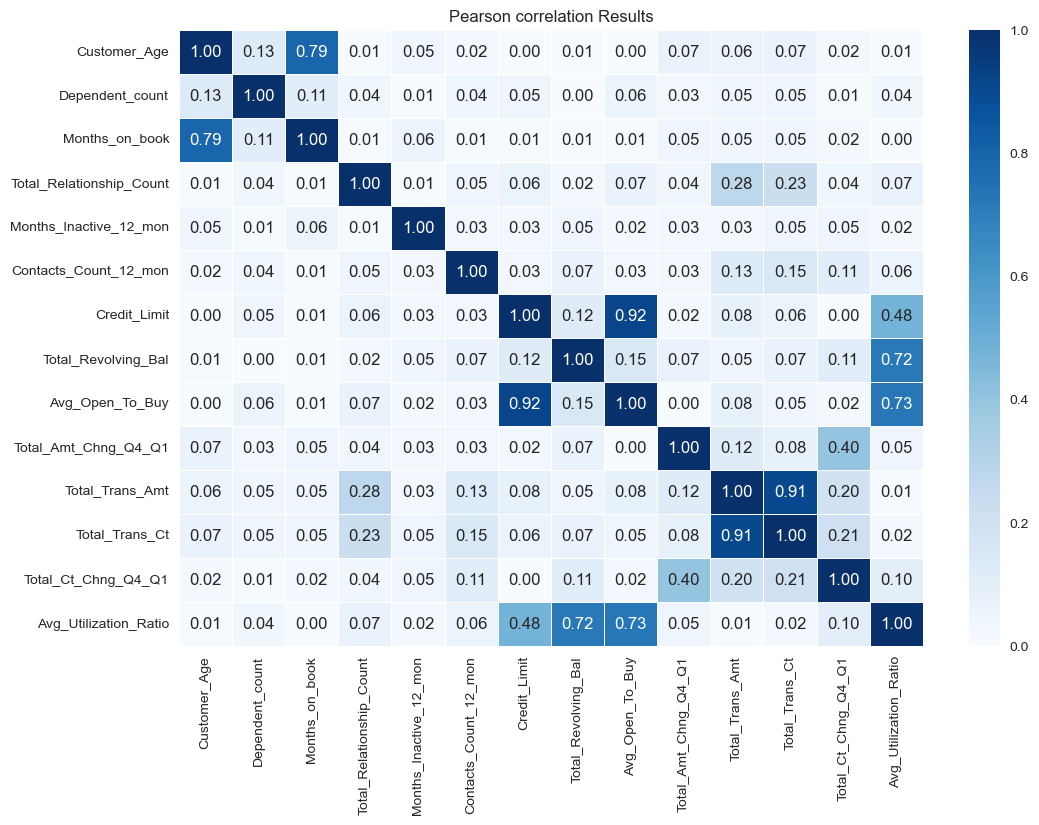

In [32]:
# check correlation with transformed data
# Pearson correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(abs(round(new_df.corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
            annot=True, 
            fmt='.2f')
plt.title('Pearson correlation Results')

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


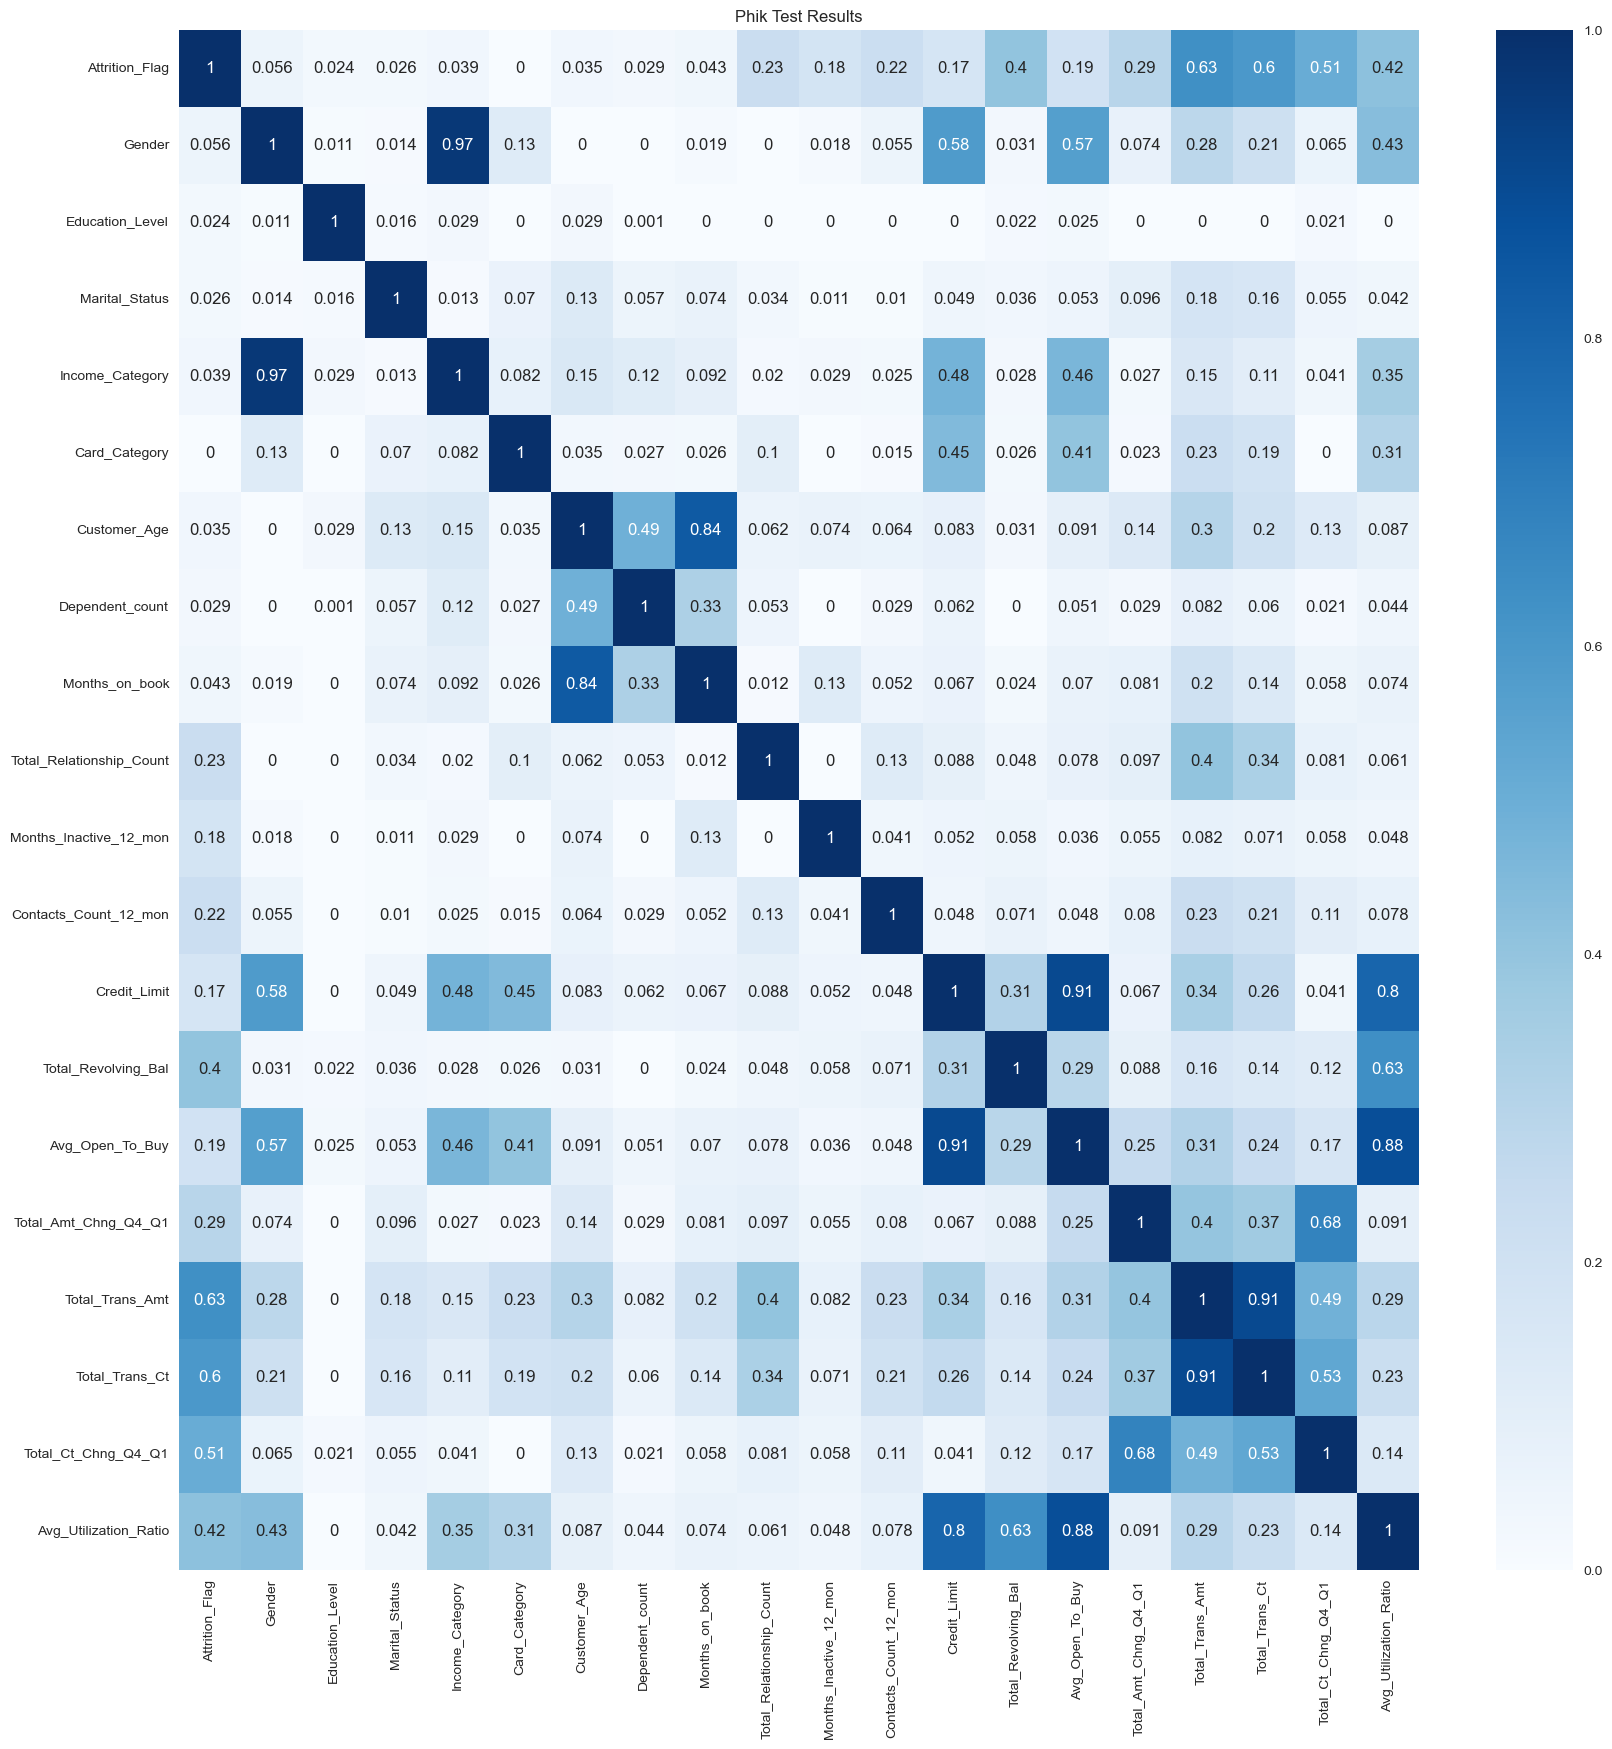

In [33]:
result = new_df.phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results')
plt.show()


interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


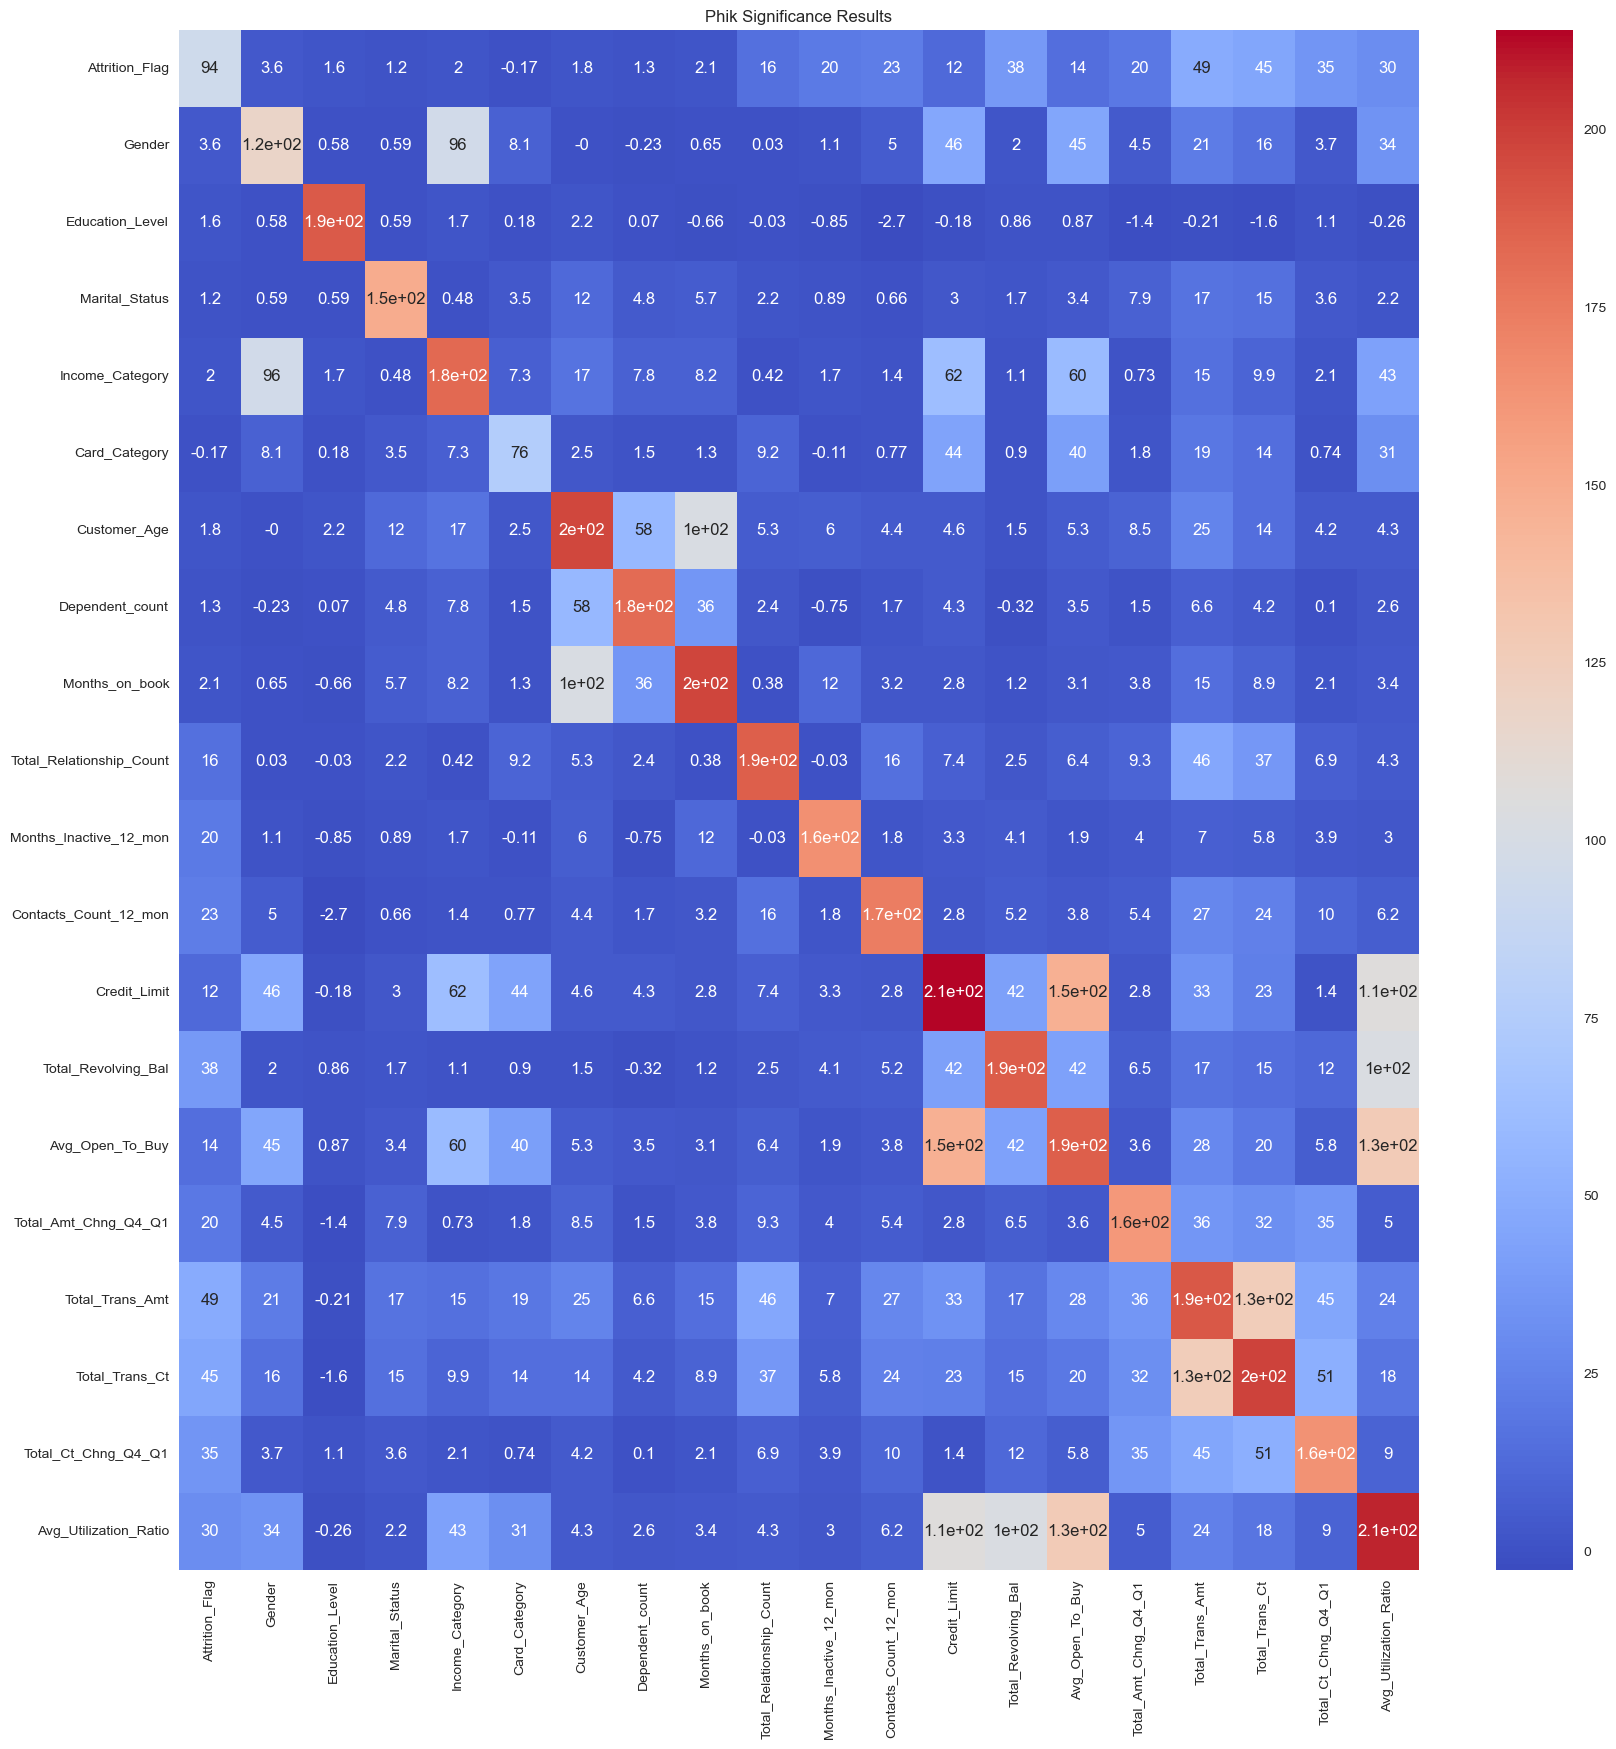

In [34]:
sig = new_df.significance_matrix()
fig = plt.figure(figsize=(20,20))
sns.heatmap(round(sig,2), annot=True, cmap='coolwarm')
plt.title('Phik Significance Results')
plt.show()

In [35]:
df. columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Data preprocessing

all numerical features will be power transformed. For cat features, I would like to try different processing of categorical features: OneHote for all categorical, OneHot for nominal features (gender, marital status, dependent count, age), ordinal features (educational level, income category, card category) will be ordinal encoded. 

In [36]:
# use a copy of df for all the feature enginnering
new_df = df.copy()

# change the dtype of  'Dependent_count' from int to categorical
new_df['Dependent_count'] = new_df['Dependent_count'].astype('category')
# bin the 'Customer age' 
converter = lambda x: '<30' if (x <= 30) else \
                        ('30-40' if (x > 30 and x <= 40) else \
                        ('40-50' if (x > 40 and x <= 50) else \
                        ('50-60' if (x > 50 and x <= 60) else \
                        '>60')))
new_df['Customer_Age'] = new_df['Customer_Age'].apply(converter)

# new feature avg_trans_amt
new_df['Avg_Trans_Amt'] = new_df['Total_Trans_Amt'] / new_df['Total_Trans_Ct']

In [37]:
# binary encode 'Attrition_Flag' and 'Gender'
new_df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})
new_df['Gender'] = df['Gender'].map({'M':0, 'F':1})

In [38]:
# define the lists of features
cat_cols = new_df.select_dtypes(include=['O', 'category']).columns
num_cols = new_df.select_dtypes(exclude=['O', 'category']).columns # need to drop gender and attrition_flag as those are binary
num_cols = [col for col in num_cols if col not in ['Attrition_Flag', 'Gender']]
ord_cols = ['Education_Level', 'Income_Category', 'Card_Category']
# sub cartegorical feature for oneHot
sub_cat_cols = [col for col in cat_cols if col not in ord_cols]
print('Categorical features:', cat_cols)
print('Numerical features:', num_cols)
print('Oridinal features:', ord_cols)
print('Sub categorical features:', sub_cat_cols)

Categorical features: Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical features: ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Avg_Trans_Amt']
Oridinal features: ['Education_Level', 'Income_Category', 'Card_Category']
Sub categorical features: ['Customer_Age', 'Dependent_count', 'Marital_Status']


**Transformed numerical features, adding new feature avg_trans_amt (total_trans_amt/total_ct_amt)**

In [39]:
num_df = pd.DataFrame(PowerTransformer().fit_transform(new_df[num_cols]), columns=num_cols)

In [40]:
num_df.head()

Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0        0.371128                  0.762305               -1.458324   
1        1.015094                  1.417080               -1.458324   
2       -0.009129                  0.112803               -1.458324   
3       -0.259895                 -0.530415                1.525554   
4       -1.827473                  0.762305               -1.458324   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               0.495883      0.962782            -0.003768         0.930320   
1              -0.406084      0.566512             0.076214         0.554222   
2              -2.246757     -0.416953            -1.666149        -0.041640   
3              -1.318361     -0.456520             1.114008        -1.128002   
4              -2.246757     -0.028788            -1.666149         0.205257   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              2.259377        -1.820680       -0.964211             3.016295   
1              2.803534        -1.605685       -1.397079             6.011005   
2              4.654269        -0.953314       -2.078301             4.359489   
3              2.454134        -1.778915       -2.078301             4.359489   
4              4.056715        -2.440781       -1.649743             4.612643   

   Avg_Utilization_Ratio  Avg_Trans_Amt  
0              -0.768027      -3.115099  
1              -0.497366      -1.314072  
2              -1.201678       1.350803  
3               1.484731       0.150670  
4              -1.201678      -2.737419

In [41]:
num_df.shape

(10127, 13)

In [42]:
# save dateframe to csv
num_df.to_csv('transformed_num_df_classifi.csv', index=False)

**OneHot all categorical except for gender and attrition_flag**

In [43]:
oneHot_cat = pd.get_dummies(new_df[cat_cols]) 

In [44]:
oneHot_cat.head()

Customer_Age_30-40  Customer_Age_40-50  Customer_Age_50-60  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   0                   1   
3                   1                   0                   0   
4                   1                   0                   0   

   Customer_Age_<30  Customer_Age_>60  Dependent_count_0  Dependent_count_1  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0                  0                  0   

   Dependent_count_2  Dependent_count_3  Dependent_count_4  ...  \
0                  0                  1                  0  ...   
1                  0                  0                  0  ...   
2                  0                  1                  0  ...   
3                  0                  0                  1  ...   
4                  0                  1                  0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 32 columns]

In [45]:
oneHot_cat.shape

(10127, 32)

In [46]:
# save dataframe to csv, not include gender and attrition_flag
oneHot_cat.to_csv('oneHot_cat_df_classifi.csv', index=False)

**Ordinal for ordinal features and oneHot for the rest of categorical features**

In [47]:
# the categories in oridinal cols
for col in ord_cols:
    print(new_df[col].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [48]:
# mapping for ordinal encoding 
# Fill ordinal missing values with modes (Education_Level and Income_Category columns) 
#(gradute for education,and 'Less than $40K' for income)
edu_map = {'Uneducated':0, 'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5,'Doctorate':6,'Unknown':3 }
income_map = {'Less than $40K':0, '$40K - $60K':1,'$60K - $80K':2, '$80K - $120K':3,  '$120K +':4, 'Unknown':0}
card_map = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
maps = [edu_map, income_map,card_map]

In [49]:
# create ordinal_df
ordinal_df = pd.DataFrame()
for col, map_ in zip(ord_cols, maps):
    ordinal_df[col]=new_df[col].map(map_) 

In [50]:
ordinal_df.head()

Education_Level  Income_Category  Card_Category
0                2                2              0
1                3                0              0
2                3                3              0
3                2                0              0
4                0                2              0

In [51]:
sub_cat_df =  pd.get_dummies(new_df[sub_cat_cols]) 

In [52]:
sub_cat_df.head()

Customer_Age_30-40  Customer_Age_40-50  Customer_Age_50-60  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   0                   1   
3                   1                   0                   0   
4                   1                   0                   0   

   Customer_Age_<30  Customer_Age_>60  Dependent_count_0  Dependent_count_1  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0                  0                  0   

   Dependent_count_2  Dependent_count_3  Dependent_count_4  Dependent_count_5  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  1   
2                  0                  1                  0                  0   
3                  0                  0                  1                  0   
4                  0                  1                  0                  0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  
0                       0  
1                       0  
2                       0  
3                       1  
4                       0

In [53]:
# combined the cat dfs
ord_oneHot_cat_df = pd.concat([ordinal_df, sub_cat_df], axis=1)

# save to csv
ord_oneHot_cat_df.to_csv('ord_oneHot_cat_df.csv', index=False)

In [54]:
# save new_df to csv. 'Gender' and attrition_flag were binary encoded in new_df
new_df.to_csv('new_df_classifi.csv', index=False)
new_df.head()

Attrition_Flag Customer_Age  Gender Dependent_count Education_Level  \
0               0        40-50       0               3     High School   
1               0        40-50       1               5        Graduate   
2               0        50-60       0               3        Graduate   
3               0        30-40       1               4     High School   
4               0        30-40       0               3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Avg_Trans_Amt  
0                  0.061      27.238095  
1                  0.105      39.121212  
2                  0.000      94.350000  
3                  0.760      58.550000  
4                  0.000      29.142857  

[5 rows x 21 columns]

### dataframes for analysis and modeling

In [55]:
# combine oneHot with num_df with 'Gender' and Attrition_Flag from new_df
oneHot_trans_num_df = pd.concat([new_df[['Attrition_Flag', 'Gender']], oneHot_cat, num_df], axis=1)

In [56]:
oneHot_trans_num_df.head()

Attrition_Flag  Gender  Customer_Age_30-40  Customer_Age_40-50  \
0               0       0                   0                   1   
1               0       1                   0                   1   
2               0       0                   0                   0   
3               0       1                   1                   0   
4               0       0                   1                   0   

   Customer_Age_50-60  Customer_Age_<30  Customer_Age_>60  Dependent_count_0  \
0                   0                 0                 0                  0   
1                   0                 0                 0                  0   
2                   1                 0                 0                  0   
3                   0                 0                 0                  0   
4                   0                 0                 0                  0   

   Dependent_count_1  Dependent_count_2  ...  Contacts_Count_12_mon  \
0                  0                  0  ...               0.495883   
1                  0                  0  ...              -0.406084   
2                  0                  0  ...              -2.246757   
3                  0                  0  ...              -1.318361   
4                  0                  0  ...              -2.246757   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.962782            -0.003768         0.930320              2.259377   
1      0.566512             0.076214         0.554222              2.803534   
2     -0.416953            -1.666149        -0.041640              4.654269   
3     -0.456520             1.114008        -1.128002              2.454134   
4     -0.028788            -1.666149         0.205257              4.056715   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0        -1.820680       -0.964211             3.016295   
1        -1.605685       -1.397079             6.011005   
2        -0.953314       -2.078301             4.359489   
3        -1.778915       -2.078301             4.359489   
4        -2.440781       -1.649743             4.612643   

   Avg_Utilization_Ratio  Avg_Trans_Amt  
0              -0.768027      -3.115099  
1              -0.497366      -1.314072  
2              -1.201678       1.350803  
3               1.484731       0.150670  
4              -1.201678      -2.737419  

[5 rows x 47 columns]

In [57]:
oneHot_trans_num_df.columns

Index(['Attrition_Flag', 'Gender', 'Customer_Age_30-40', 'Customer_Age_40-50',
       'Customer_Age_50-60', 'Customer_Age_<30', 'Customer_Age_>60',
       'Dependent_count_0', 'Dependent_count_1', 'Dependent_count_2',
       'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver', 'Months_on_book',
       'Total_Relationship_Count', 'Mon

In [58]:
# save to csv
oneHot_trans_num_df.to_csv('oneHot_trans_num_classifi.csv', index=False)

In [59]:
# combine ordinal, sub_oneHot and num_df to one df
ord_oneHot_trans_num_df = pd.concat([new_df[['Attrition_Flag', 'Gender']], ord_oneHot_cat_df, num_df], axis=1)

In [60]:
ord_oneHot_trans_num_df.head()

Attrition_Flag  Gender  Education_Level  Income_Category  Card_Category  \
0               0       0                2                2              0   
1               0       1                3                0              0   
2               0       0                3                3              0   
3               0       1                2                0              0   
4               0       0                0                2              0   

   Customer_Age_30-40  Customer_Age_40-50  Customer_Age_50-60  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   0                   1   
3                   1                   0                   0   
4                   1                   0                   0   

   Customer_Age_<30  Customer_Age_>60  ...  Contacts_Count_12_mon  \
0                 0                 0  ...               0.495883   
1                 0                 0  ...              -0.406084   
2                 0                 0  ...              -2.246757   
3                 0                 0  ...              -1.318361   
4                 0                 0  ...              -2.246757   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.962782            -0.003768         0.930320              2.259377   
1      0.566512             0.076214         0.554222              2.803534   
2     -0.416953            -1.666149        -0.041640              4.654269   
3     -0.456520             1.114008        -1.128002              2.454134   
4     -0.028788            -1.666149         0.205257              4.056715   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0        -1.820680       -0.964211             3.016295   
1        -1.605685       -1.397079             6.011005   
2        -0.953314       -2.078301             4.359489   
3        -1.778915       -2.078301             4.359489   
4        -2.440781       -1.649743             4.612643   

   Avg_Utilization_Ratio  Avg_Trans_Amt  
0              -0.768027      -3.115099  
1              -0.497366      -1.314072  
2              -1.201678       1.350803  
3               1.484731       0.150670  
4              -1.201678      -2.737419  

[5 rows x 33 columns]

In [61]:
ord_oneHot_trans_num_df.shape

(10127, 33)

In [62]:
ord_oneHot_trans_num_df['Attrition_Flag'].value_counts(normalize=True)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [63]:
# save df to csv
ord_oneHot_trans_num_df.to_csv('ord_oneHot_trans_num_classifi.csv', index=False)

### correlation of new dataframes

Text(0.5, 1.0, 'Pearson correlation Results of OneHot_trans_num_df')

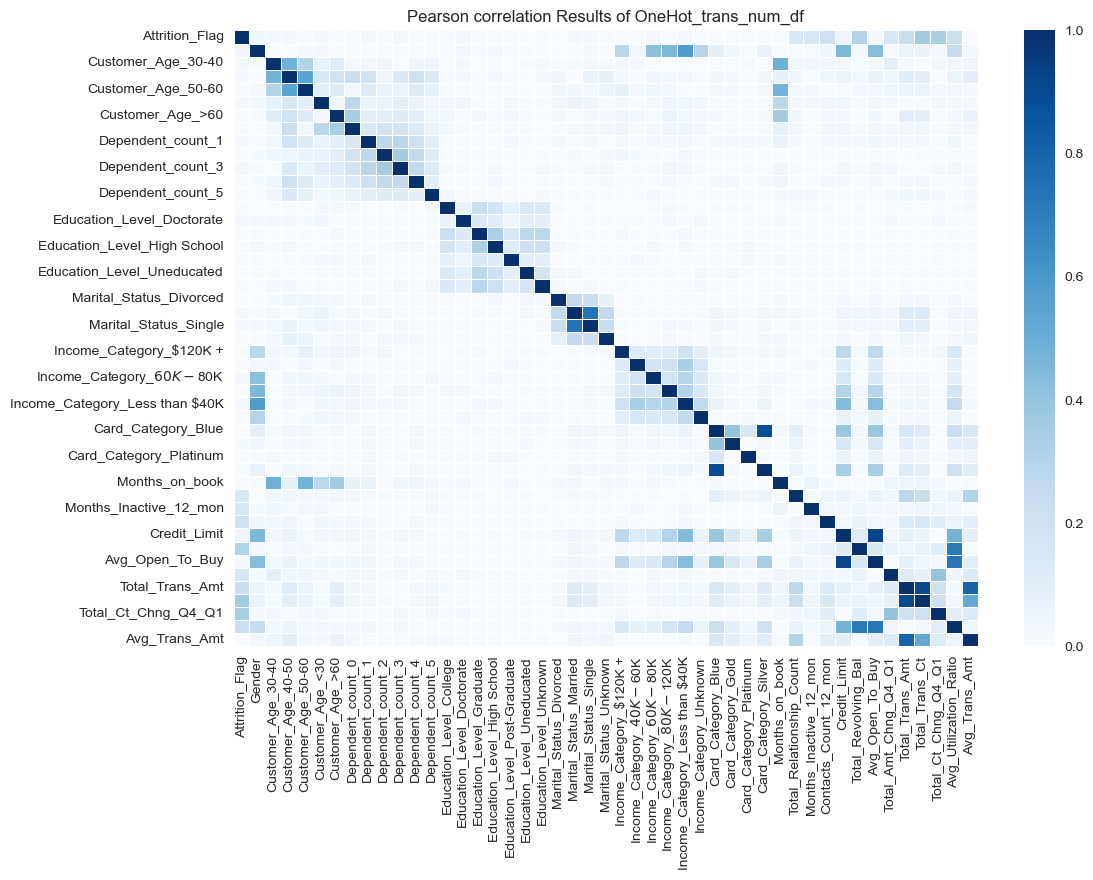

In [64]:
# Pearson correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(abs(round(oneHot_trans_num_df.corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
#             annot=True, 
            fmt='.2f')
plt.title('Pearson correlation Results of OneHot_trans_num_df')

interval columns not set, guessing: ['Attrition_Flag', 'Gender', 'Customer_Age_30-40', 'Customer_Age_40-50', 'Customer_Age_50-60', 'Customer_Age_<30', 'Customer_Age_>60', 'Dependent_count_0', 'Dependent_count_1', 'Dependent_count_2', 'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5', 'Education_Level_College', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Tota

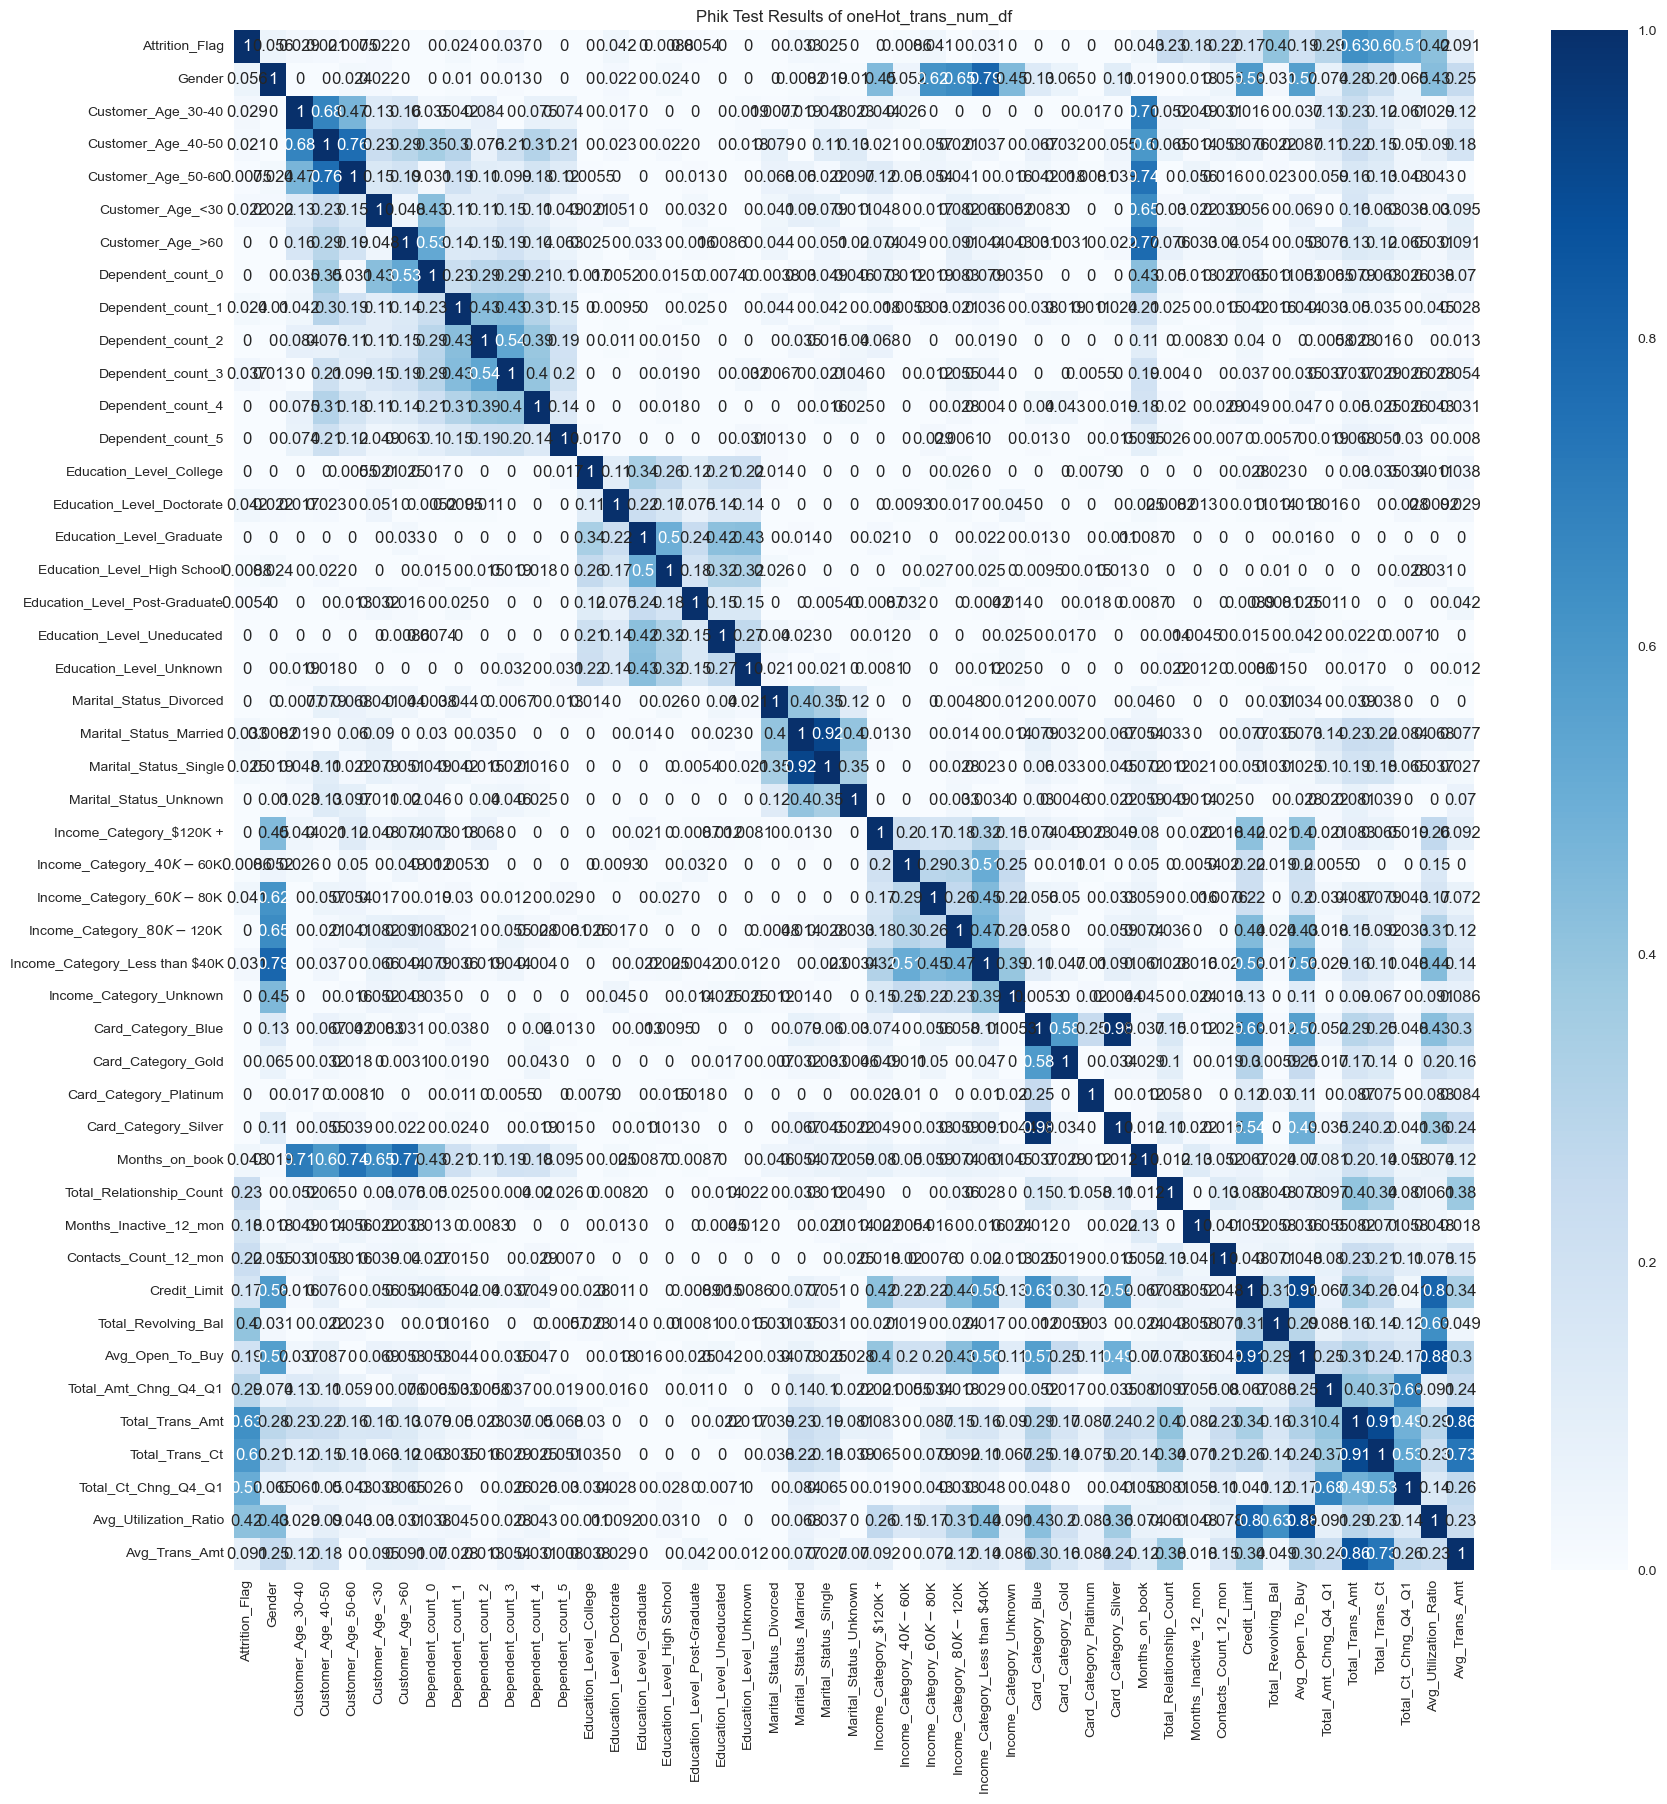

In [65]:
result = oneHot_trans_num_df.phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results of oneHot_trans_num_df')
plt.show()

Text(0.5, 1.0, 'Pearson correlation Results of ord_oneHot_trans_num_df')

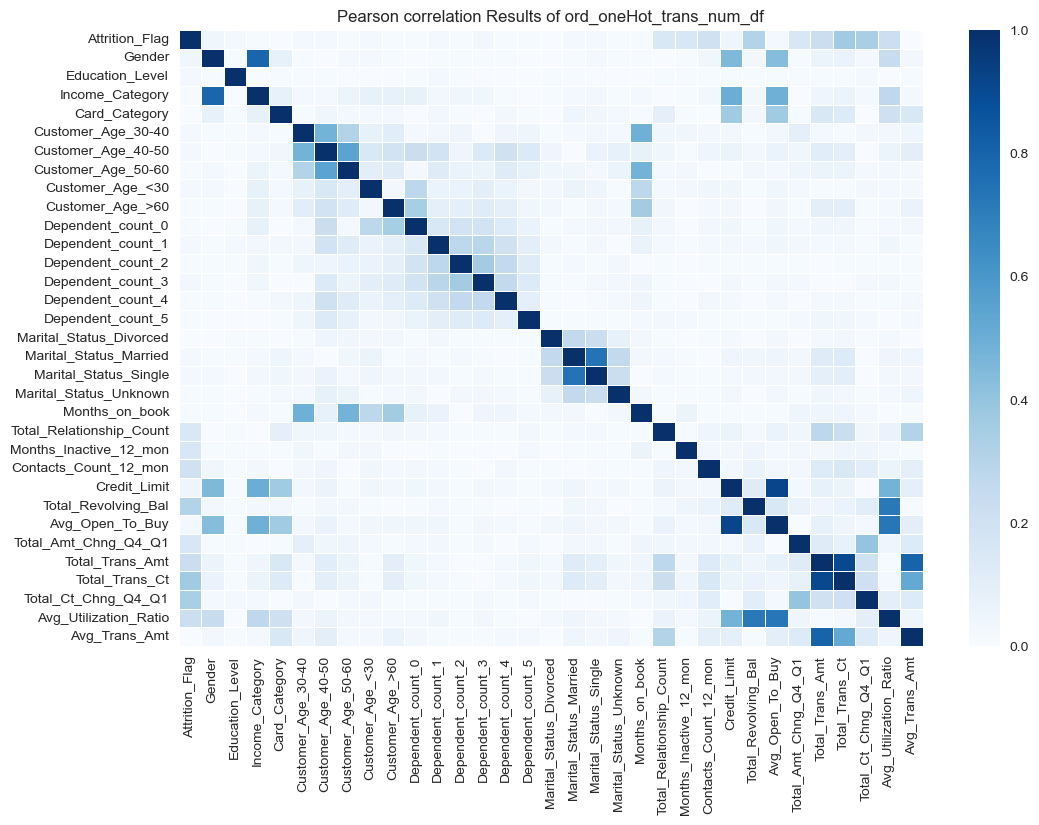

In [66]:
# Pearson correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(abs(round(ord_oneHot_trans_num_df.corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
#             annot=True, 
            fmt='.2f')
plt.title('Pearson correlation Results of ord_oneHot_trans_num_df')

interval columns not set, guessing: ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Customer_Age_30-40', 'Customer_Age_40-50', 'Customer_Age_50-60', 'Customer_Age_<30', 'Customer_Age_>60', 'Dependent_count_0', 'Dependent_count_1', 'Dependent_count_2', 'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Avg_Trans_Amt']


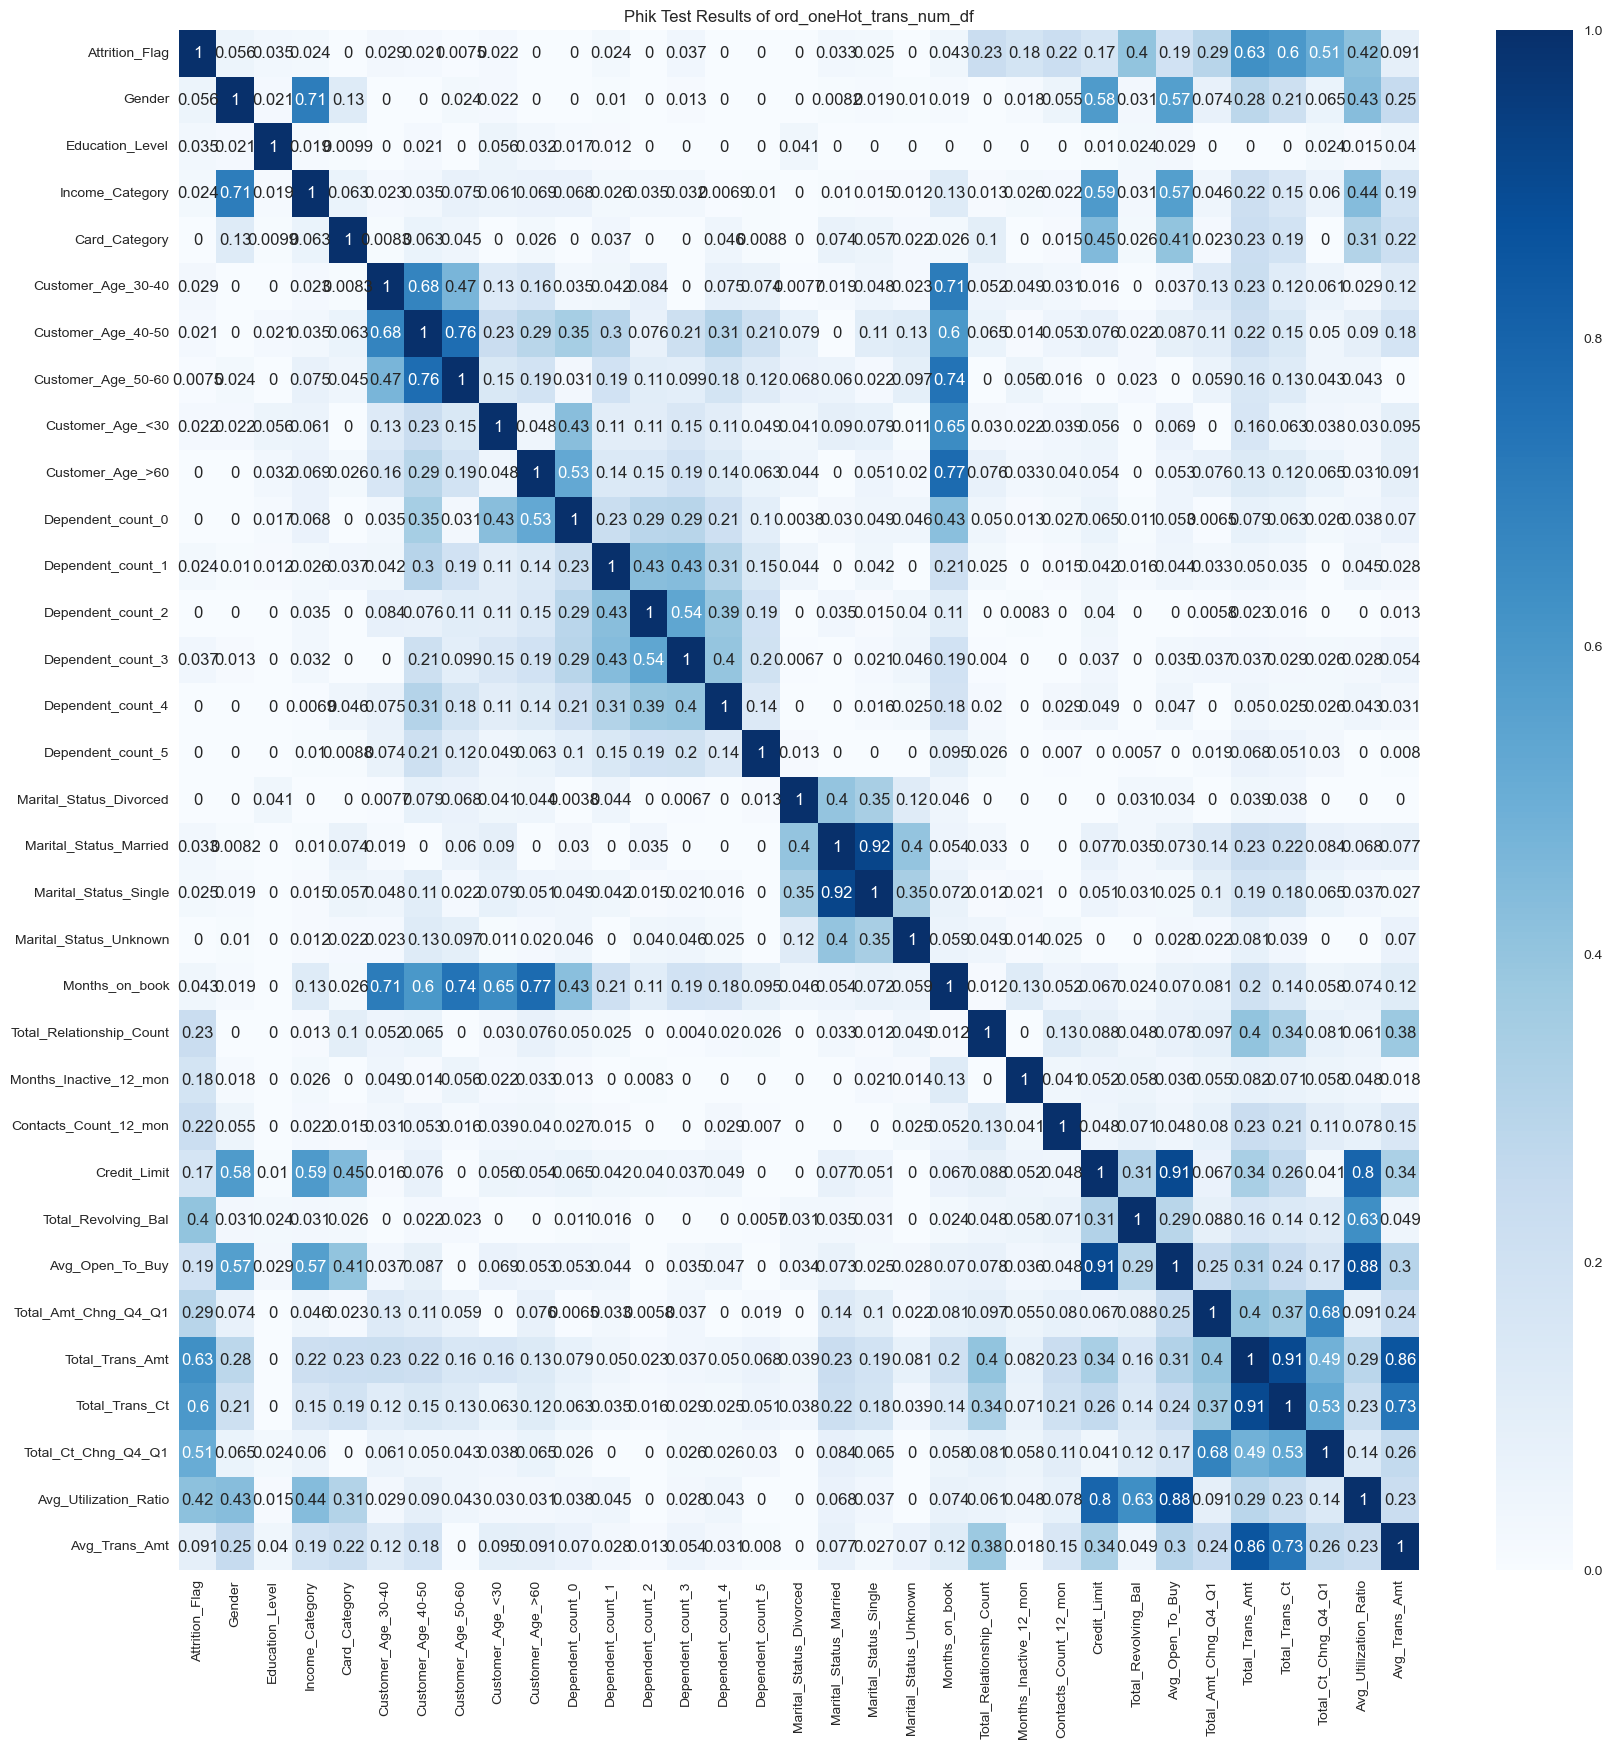

In [67]:
result = ord_oneHot_trans_num_df.phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results of ord_oneHot_trans_num_df')
plt.show()

## Split train and test datasets, upsampling train dataset using SMOTE

In [68]:
## generate X and y using oneHot_tran_num_df
data = pd.read_csv('oneHot_trans_num_classifi.csv')

X = data.drop(columns="Attrition_Flag")

y = data["Attrition_Flag"]

In [69]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [70]:
X.head()

Gender  Customer_Age_30-40  Customer_Age_40-50  Customer_Age_50-60  \
0       0                   0                   1                   0   
1       1                   0                   1                   0   
2       0                   0                   0                   1   
3       1                   1                   0                   0   
4       0                   1                   0                   0   

   Customer_Age_<30  Customer_Age_>60  Dependent_count_0  Dependent_count_1  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0                  0                  0   

   Dependent_count_2  Dependent_count_3  ...  Contacts_Count_12_mon  \
0                  0                  1  ...               0.495883   
1                  0                  0  ...              -0.406084   
2                  0                  1  ...              -2.246757   
3                  0                  0  ...              -1.318361   
4                  0                  1  ...              -2.246757   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.962782            -0.003768         0.930320              2.259377   
1      0.566512             0.076214         0.554222              2.803534   
2     -0.416953            -1.666149        -0.041640              4.654269   
3     -0.456520             1.114008        -1.128002              2.454134   
4     -0.028788            -1.666149         0.205257              4.056715   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0        -1.820680       -0.964211             3.016295   
1        -1.605685       -1.397079             6.011005   
2        -0.953314       -2.078301             4.359489   
3        -1.778915       -2.078301             4.359489   
4        -2.440781       -1.649743             4.612643   

   Avg_Utilization_Ratio  Avg_Trans_Amt  
0              -0.768027      -3.115099  
1              -0.497366      -1.314072  
2              -1.201678       1.350803  
3               1.484731       0.150670  
4              -1.201678      -2.737419  

[5 rows x 46 columns]

In [71]:
# calculate variance in target
# variance = sum((frequency - mean)^2) / n # categorical

# variance = sum((y - y.mean())**2) / (len(y)-1) #numerical
# variance


In [72]:
# split tran and test, using stratify since the data set is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1234)

# y_train.to_csv("y_train.csv", index=False)
# y_test.to_csv("y_test.csv", index=False)

In [73]:
X_train.to_csv("X_train_oneHot_trans_num.csv", index=False)
y_train.to_csv("y_train_oneHot_trans_num.csv", index=False)
X_test.to_csv("X_test_oneHot_trans_num.csv", index=False)
y_test.to_csv("y_test_oneHot_trans_num.csv", index=False)

In [74]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: Attrition_Flag, dtype: float64

In [75]:
y_test.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

**Upsampling train set using SMOTE**

In [76]:
s = SMOTE(random_state=1234)
X_train_sm, y_train_sm = s.fit_resample(X_train, y_train)

X_train_sm.to_csv("X_train_oneHot_trans_num_sm.csv", index=False)
y_train_sm.to_csv("y_train_oneHot_trans_num_sm.csv", index=False)

### Feature selection
I will try a few methods to select features: variance threshold, selectKBest with f_classif/mutual_info_classif (cannot use chi squared because it works on non-negative data only, and the power_transformed numerical data have negative values), slectPercentile, recursive feature elimination, select from model with l1-based model/ tree-based model. Maybe sequential feature slection (it maybe slow).

**Variance threshold**
remove low variance features (basic selection)

In [77]:
# sel = VarianceThreshold()
sel = VarianceThreshold(threshold=0.135) # variance in target y
sel.fit(X)
# use threshold 0.9*(1-0.9),and get 33 features. Use threshold 0.8(1-0.8), and get 24 features
# use (0.7*(1-0.7), get 19 features

VarianceThreshold(threshold=0.135)

In [78]:
sel1 = VarianceThreshold(threshold= 0.135) # variance in target y use categorical variance
sel1.fit(X)

VarianceThreshold(threshold=0.135)

In [79]:
len(sel1.get_feature_names_out())

26

In [80]:
sel.get_feature_names_out()

array(['Gender', 'Customer_Age_30-40', 'Customer_Age_40-50',
       'Customer_Age_50-60', 'Dependent_count_1', 'Dependent_count_2',
       'Dependent_count_3', 'Education_Level_Graduate',
       'Education_Level_High School', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_Less than $40K', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans_Amt'], dtype=object)

In [81]:
# selection with variance threshold 0.6*(1-0.6), 16 features
ft_variance = sel.get_feature_names_out()
print('16 features selected by variance threshold 0.6*(1-0.6) are:\n\n', ft_variance)

16 features selected by variance threshold 0.6*(1-0.6) are:

 ['Gender' 'Customer_Age_30-40' 'Customer_Age_40-50' 'Customer_Age_50-60'
 'Dependent_count_1' 'Dependent_count_2' 'Dependent_count_3'
 'Education_Level_Graduate' 'Education_Level_High School'
 'Marital_Status_Married' 'Marital_Status_Single'
 'Income_Category_$40K - $60K' 'Income_Category_Less than $40K'
 'Months_on_book' 'Total_Relationship_Count' 'Months_Inactive_12_mon'
 'Contacts_Count_12_mon' 'Credit_Limit' 'Total_Revolving_Bal'
 'Avg_Open_To_Buy' 'Total_Amt_Chng_Q4_Q1' 'Total_Trans_Amt'
 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio'
 'Avg_Trans_Amt']


**Select using sklearn selectKBest and f_classif (for anova test)** univariate test 

In [82]:
from sklearn.feature_selection import f_classif

In [83]:
f_statistic, p_values = f_classif(X,y)
anova_df = pd.DataFrame({'feature': X.columns, 'f_score':f_statistic, 'p_value': p_values})
anova_df.sort_values(by='p_value', ascending=True)

feature      f_score        p_value
42                  Total_Trans_Ct  1647.415269   0.000000e+00
43             Total_Ct_Chng_Q4_Q1  1364.973004  2.036484e-280
38             Total_Revolving_Bal  1098.724416  7.893604e-229
41                 Total_Trans_Amt   580.670940  8.382202e-125
44           Avg_Utilization_Ratio   529.134438  3.564441e-114
36           Contacts_Count_12_mon   440.165438   1.064024e-95
35          Months_Inactive_12_mon   266.151886   4.423704e-59
40            Total_Amt_Chng_Q4_Q1   262.236782   3.002157e-58
34        Total_Relationship_Count   232.061845   7.932544e-52
37                    Credit_Limit    28.325298   1.047391e-07
0                           Gender    14.085007   1.757076e-04
13       Education_Level_Doctorate     8.750997   3.101483e-03
25     Income_Category_$60K - $80K     8.070008   4.509375e-03
9                Dependent_count_3     6.901389   8.625860e-03
20          Marital_Status_Married     5.707375   1.691198e-02
27  Income_Category_Less than $40K     5.112675   2.377280e-02
1               Customer_Age_30-40     4.662450   3.085258e-02
21           Marital_Status_Single     3.670544   5.541023e-02
7                Dependent_count_1     3.408072   6.490739e-02
4                 Customer_Age_<30     3.213819   7.304869e-02
2               Customer_Age_40-50     2.946735   8.608181e-02
39                 Avg_Open_To_Buy     2.866161   9.049116e-02
33                  Months_on_book     1.803503   1.793197e-01
15     Education_Level_High School     1.393221   2.378897e-01
24     Income_Category_$40K - $60K     1.383419   2.395473e-01
3               Customer_Age_50-60     1.297851   2.546330e-01
16   Education_Level_Post-Graduate     1.253815   2.628516e-01
31          Card_Category_Platinum     1.186054   2.761529e-01
5                 Customer_Age_>60     0.952508   3.291050e-01
6                Dependent_count_0     0.943704   3.313502e-01
23         Income_Category_$120K +     0.930136   3.348507e-01
14        Education_Level_Graduate     0.828647   3.626858e-01
18         Education_Level_Unknown     0.821192   3.648534e-01
22          Marital_Status_Unknown     0.802831   3.702696e-01
32            Card_Category_Silver     0.725856   3.942500e-01
12         Education_Level_College     0.622437   4.301615e-01
28         Income_Category_Unknown     0.521808   4.700881e-01
30              Card_Category_Gold     0.361190   5.478597e-01
8                Dependent_count_2     0.345294   5.568026e-01
11               Dependent_count_5     0.309755   5.778428e-01
10               Dependent_count_4     0.282887   5.948268e-01
45                   Avg_Trans_Amt     0.194490   6.592151e-01
26    Income_Category_$80K - $120K     0.121124   7.278261e-01
29              Card_Category_Blue     0.104735   7.462260e-01
17      Education_Level_Uneducated     0.021117   8.844644e-01
19         Marital_Status_Divorced     0.007313   9.318536e-01

In [84]:
# 17 features with p < 0.05
ft_by_avona = anova_df[anova_df['p_value'] < 0.05].sort_values(by='p_value', ascending=True).reset_index(drop=True) 

In [85]:
from IPython.display import display
display(ft_by_avona)

feature      f_score        p_value
0                   Total_Trans_Ct  1647.415269   0.000000e+00
1              Total_Ct_Chng_Q4_Q1  1364.973004  2.036484e-280
2              Total_Revolving_Bal  1098.724416  7.893604e-229
3                  Total_Trans_Amt   580.670940  8.382202e-125
4            Avg_Utilization_Ratio   529.134438  3.564441e-114
5            Contacts_Count_12_mon   440.165438   1.064024e-95
6           Months_Inactive_12_mon   266.151886   4.423704e-59
7             Total_Amt_Chng_Q4_Q1   262.236782   3.002157e-58
8         Total_Relationship_Count   232.061845   7.932544e-52
9                     Credit_Limit    28.325298   1.047391e-07
10                          Gender    14.085007   1.757076e-04
11       Education_Level_Doctorate     8.750997   3.101483e-03
12     Income_Category_$60K - $80K     8.070008   4.509375e-03
13               Dependent_count_3     6.901389   8.625860e-03
14          Marital_Status_Married     5.707375   1.691198e-02
15  Income_Category_Less than $40K     5.112675   2.377280e-02
16              Customer_Age_30-40     4.662450   3.085258e-02

In [86]:
# f_classif is the defalut score function for selectKBest
# sel = SelectKBest(f_classif, k=15)
# sel.fit(X_train, y_train)

In [87]:
# sel.get_feature_names_out()

In [88]:
# df_scores = pd.DataFrame({'feature': X_train.columns, 'score': sel.scores_, 'p_value': sel.pvalues_})
# df_scores.sort_values(by='p_value', ascending=True)

In [89]:
# ft_15_anova = sel.get_feature_names_out()
# print('15 features selected by anova test are:\n\n', ft_15_anova)

**Select using sklearn selectKBest and mutual_info_classif** univariate test. relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

In [90]:
from sklearn.feature_selection import mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=15)
sel.fit(X_train, y_train)

SelectKBest(k=15,
            score_func=<function mutual_info_classif at 0x0000023C50399E50>)

In [91]:
sel.get_feature_names_out()

array(['Education_Level_College', 'Education_Level_Post-Graduate',
       'Marital_Status_Married', 'Income_Category_$120K +',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [92]:
df_scores = pd.DataFrame({'feature': X_train.columns, 'score': sel.scores_})
df_scores.sort_values(by='score', ascending=False)

feature     score
41                 Total_Trans_Amt  0.157205
42                  Total_Trans_Ct  0.116012
43             Total_Ct_Chng_Q4_Q1  0.100295
38             Total_Revolving_Bal  0.090726
44           Avg_Utilization_Ratio  0.049203
40            Total_Amt_Chng_Q4_Q1  0.032104
36           Contacts_Count_12_mon  0.030341
35          Months_Inactive_12_mon  0.022809
34        Total_Relationship_Count  0.020080
39                 Avg_Open_To_Buy  0.017375
16   Education_Level_Post-Graduate  0.009358
20          Marital_Status_Married  0.008871
12         Education_Level_College  0.005778
23         Income_Category_$120K +  0.005762
37                    Credit_Limit  0.005676
27  Income_Category_Less than $40K  0.004811
25     Income_Category_$60K - $80K  0.004482
14        Education_Level_Graduate  0.004350
5                 Customer_Age_>60  0.002212
22          Marital_Status_Unknown  0.001981
45                   Avg_Trans_Amt  0.001951
30              Card_Category_Gold  0.001875
28         Income_Category_Unknown  0.001797
13       Education_Level_Doctorate  0.001738
3               Customer_Age_50-60  0.001650
15     Education_Level_High School  0.001486
21           Marital_Status_Single  0.001377
8                Dependent_count_2  0.001299
6                Dependent_count_0  0.000503
31          Card_Category_Platinum  0.000371
32            Card_Category_Silver  0.000069
10               Dependent_count_4  0.000000
2               Customer_Age_40-50  0.000000
4                 Customer_Age_<30  0.000000
7                Dependent_count_1  0.000000
9                Dependent_count_3  0.000000
33                  Months_on_book  0.000000
11               Dependent_count_5  0.000000
19         Marital_Status_Divorced  0.000000
29              Card_Category_Blue  0.000000
17      Education_Level_Uneducated  0.000000
26    Income_Category_$80K - $120K  0.000000
18         Education_Level_Unknown  0.000000
24     Income_Category_$40K - $60K  0.000000
1               Customer_Age_30-40  0.000000
0                           Gender  0.000000

In [93]:
ft_15_mut = sel.get_feature_names_out()
print('15 features selected by mutual_info_classif test are:\n\n', ft_15_mut)

15 features selected by mutual_info_classif test are:

 ['Education_Level_College' 'Education_Level_Post-Graduate'
 'Marital_Status_Married' 'Income_Category_$120K +'
 'Total_Relationship_Count' 'Months_Inactive_12_mon'
 'Contacts_Count_12_mon' 'Credit_Limit' 'Total_Revolving_Bal'
 'Avg_Open_To_Buy' 'Total_Amt_Chng_Q4_Q1' 'Total_Trans_Amt'
 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio']


**Recursive feature elimination with random forest**
Recursive feature elimination with cross-validation to select features

In [94]:

# # Create a random forest classifier
# model = RandomForestClassifier(random_state=42)

# # Create the RFE object and rank each feature
# rfe = RFE(model, n_features_to_select=10, verbose=1)
# rfe = rfe.fit(X_train, y_train)


In [95]:
# set class_weight='balanced' for RF
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
rf_cw = RandomForestClassifier(class_weight='balanced', random_state=42)
rfecv = RFECV(estimator=rf_cw, cv=5, scoring='accuracy') # default is StratifiedKFold cv
rfecv.fit(X, y)

end = time.time() 
print(f'This session took {(end - start) / 60} minutes.')

KeyboardInterrupt: 

In [ ]:
rfecv.support_

In [ ]:
rfecv.n_features_

In [ ]:
# plot n_features and cross_validation score
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.savefig('rfecv_feature_selection.png')
plt.show()

In [ ]:
mask_rfecw = rfecv.get_support()
features = X.columns
best_features = features[mask_rfecw]
 
print("All features: ", X.shape[1])
print(features)

print("/nSelected best: ", best_features.shape[0])
print(features[mask_rfecw]) 

In [ ]:
print("Feature ranking: ", rfecv.ranking_)

In [ ]:
# Print the features and their ranking (high rank = more important)
# df_rfe_rf = pd.DataFrame({'feature': X_train.columns, 'ranking': rfe.ranking_})
# df_rfe_rf.sort_values(by='ranking', ascending=True)

In [ ]:
ft_rfe_rf10 = X_train.columns[rfe.support_]
print('top 10 features selected by rfe svc are:\n\n', ft_rfe_rf10)

**RFE with random forest is fast than with svc**

**select from model with logistic regression**

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression

# selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)


In [ ]:
# selector.estimator_.coef_

In [ ]:
# selector.threshold_

In [ ]:
# selector.get_support()

In [ ]:
# ft_sfm_lr = X_train.columns[selector.get_support()]
# print('top 10 features selected by rfe svc are:\n\n', ft_sfm_lr)

**select from model with svc**

In [ ]:
# selector = SelectFromModel(estimator=SVR(kernel="linear")).fit(X_train, y_train)

In [ ]:
# ft_sfm_svc = X_train.columns[selector.get_support()]
# print('top 10 features selected by rfe svc are:\n\n', ft_sfm_svc)

**select from model with random forest**

In [ ]:
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(X_train, y_train)

In [ ]:
ft_sfm_rf = X_train.columns[selector.get_support()]
print('top 10 features selected by rfe svc are:\n\n', ft_sfm_rf)

**sequential feature selection with logistic regression**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs_forward = SequentialFeatureSelector(
    LogisticRegression(), n_features_to_select=10, direction="forward")
sfs_forward.fit(X_train, y_train)

In [ ]:
print(
    "Features selected by forward sequential selection with logistric regression: \n"
    f"{X_train.columns[sfs_forward.get_support()]}")

**sequenctial feature selection with random forest**

In [ ]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(), n_features_to_select=10, direction="forward")
sfs_forward.fit(X_train, y_train)

In [ ]:
print(
    "Features selected by forward sequential selection with random forest: \n"
    f"{X_train.columns[sfs_forward.get_support()]}")

In [ ]:
# 12 features are selected from all the testing methods
ft12= ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
# Pearson correlation with absolute values
plt.figure(figsize=(12,8))
sns.heatmap(abs(round(oneHot_trans_num_df[ft12 + ['Attrition_Flag']].corr(),2)), 
#             vmin=-1.0, 
#             vmax=1.0, 
            linewidths=0.5, 
            cmap='Blues', 
            annot=True, 
            fmt='.2f')
plt.title('Pearson correlation Results of 12 transformed num features')

In [ ]:
result = oneHot_trans_num_df[ft12 + ['Attrition_Flag']].phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results of ord_oneHot_trans_num_df')
plt.show()

In [ ]:
# remove a few features because of multicolinarity from phik and pearson correlation
# use 0.8 as threshold to remove correlated featues
# credit_limit and avg_opene_to_buy ( keep credit_limit)
# avg_utilization_ratio and avg_opene_to_buy  ( keep avg_utilization_ratio)
# avg_utilization_ratio and credit_limit (0.8, keep both)
# total_trans_amt and total_trans_ct (0.91, keep total_trans_ct )
# drop 'Months_on_book' since it not correlated to 'Attrition_Flag'
ft_9 = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
result = oneHot_trans_num_df[ft_9 + ['Attrition_Flag']].phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik Test Results of ord_oneHot_trans_num_df')
plt.show()

## model selection

## fit with 12 features and imbalanced train set

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234,class_weight='balanced')))
# models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234,class_weight='balanced')))
# models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234,class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train[ft12], y_train)
    scores = recall_score(y_train, model.predict(X_train[ft12])) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test[ft12])
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

### fit in 9 features with imbalanced data set

In [ ]:
print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train[ft_9], y_train)
    scores = recall_score(y_train, model.predict(X_train[ft_9])) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test[ft_9])
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

### fit in smoted train set with 12 features

In [ ]:
print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_sm[ft12], y_train_sm)
    scores = recall_score(y_train_sm, model.predict(X_train_sm[ft12])) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test[ft12])
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

### fit in smoted train set with 9 features

In [ ]:
print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_sm[ft_9], y_train_sm)
    scores = recall_score(y_train_sm, model.predict(X_train_sm[ft_9])) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test[ft_9])
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

### fitting logistric regression and adjust threshold

In [ ]:
# fit in 12 features # no regulation
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train[ft12], y_train)

In [ ]:
# churn class proba
y_train_proba = lr.predict_proba(X_train[ft12])[:,1]
y_test_proba = lr.predict_proba(X_test[ft12])[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
thresholds = np.arange(0.0, 1.05, 0.01)
perf = pd.DataFrame(columns=["accuracy", "recall", "precision", "f1_score"])
for i in thresholds:
    preds = np.where(y_test_proba>i, 1,0)
    
    met = pd.DataFrame({"accuracy":accuracy_score(y_test, preds),"recall": recall_score(y_test, preds),
                        "precision": precision_score(y_test, preds), 'f1_score':f1_score(y_test, preds)},
                       index=[round(i,1)]
                      )
    perf = pd.concat([perf, met], axis=0)
perf

In [ ]:
fig, ax = plt.subplots()
ax.plot(perf.index, perf['recall'],'.-', label='recall score')
ax.plot(perf.index, perf['precision'],'.-', label='precision score')
ax.plot(perf.index, perf['f1_score'],'.-', label='f1 score')
ax.legend()
ax.set_xlabel('threshold')
ax.set_ylabel('metrics score')
ax.set_xticks(ticks=np.arange(0.1, 1, 0.1), minor=True)
ax.set_title('Logistic Regression on test set')
plt.savefig('metrics3.png')

In [ ]:
lr_features = pd.DataFrame({
    'feature': list(X_train[ft12].columns), 
                            'coefficient':list(lr.coef_.reshape(-1,1))
                           })
lr_features

In [ ]:
lr_features = pd.DataFrame(lr.coef_, columns=ft12)
lr_features

In [ ]:
lr_coefs = lr_features.to_dict(orient='index')
lr_coefs

In [ ]:
lr_coefs[0].keys()

In [ ]:
lr_coefs[0].values()

In [ ]:
coef_df = pd.DataFrame({'feature': lr_coefs[0].keys(), 'coefficient':lr_coefs[0].values()})
coef_df.sort_values(by='coefficient', key=lambda x:abs(x), ascending=False, inplace=True)
# df.sort_values(by=['A'], key=lambda x: abs(x), ascending=False)

In [ ]:
# Feature importance
plt.figure(figsize=(16,10))
# sns.barplot(x=list(lr_coefs[0].keys()),y=list(lr_coefs[0].values()))
sns.barplot(x=coef_df['feature'],y=coef_df['coefficient'])
plt.tick_params(axis='x', rotation=30)
plt.ylabel('coefficient')
plt.title('Feature coefficients of Logistic Regression')
plt.savefig('lr_coefs.png')

In [ ]:
# Feature importance
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 20})
# sns.barplot(x=list(lr_coefs[0].values()), y=list(lr_coefs[0].keys()))
sns.barplot(y=coef_df['feature'],x=coef_df['coefficient'])
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel('coefficient', fontsize=18)

plt.title('Feature coefficients of Logistic Regression', fontsize=18)
plt.savefig('lr_coefs_bar.png')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = lr.predict(X_test[ft12])
cm = confusion_matrix(y_test, y_pred)

# Set the default font size for all text elements
plt.rcParams.update({'font.size': 20})

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('consfusion_lr_p5.png')

In [ ]:
y_proba = lr.predict_proba(X_test[ft12])
y_proba

In [ ]:
y_test_proba = lr.predict_proba(X_test[ft12])
y_pred = np.where(y_test_proba[:,1]>0.3, 1,0)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size': 20})
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('confusion_p3.png')

In [ ]:
38/(287+38)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = lr.decision_function(X_test[ft12])

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC')
plt.savefig('lr_roc.png')

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lr.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision-Recall curve')
plt.savefig('lr_pr_curve.png')

In [ ]:
# Explain model predictions using SHAP
explainer = shap.LinearExplainer(lr, X_train[ft12])
shap_values = explainer.shap_values(X_test[ft12])

In [ ]:
plt.rcParams.update({'font.size': 20})
shap.summary_plot(shap_values, features=X_test[ft12], feature_names=ft12, 
#                   plot_size=[10,12], 
#                   normalize=True,
                  plot_type="bar",
                 )
plt.savefig('shap_lr.png')

In [ ]:
plt.rcParams.update({'font.size': 20})
shap.summary_plot(shap_values, features=X_test[ft12], feature_names=ft12, 
#                   plot_size=[10,12], 
#                   normalize=True,
#                   plot_type="bar",
                    link='logit',
                 )
plt.savefig('shap_lr.png')

In [ ]:
query = X_test[ft12].iloc[0,:]
query

In [ ]:
query = X_test[ft12].iloc[0,:]
#get Shap values from preprocessed data
shap_values = explainer.shap_values(query)
#plot the feature importance
shap.force_plot(explainer.expected_value, shap_values, query, matplotlib=True,show=False, feature_names=ft12)

## Try Xiaofeng's features and fit models

In [96]:
ft11 = ['Total_Trans_Ct',
        'Cost_per_Buy',
        'Total_Amt_Chng_Q4_Q1',
        'Total_Ct_Chng_Q4_Q1',
        'Total_Relationship_Count',
        'Customer_Age',
        'Total_Revolving_Bal',
        'Months_Inactive_12_mon',
        'Months_on_book',
        'Credit_Limit',
        'Avg_Utilization_Ratio']

In [97]:
df['Cost_per_Buy']=df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [98]:
X = df[ft11]

In [99]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [100]:
y = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

In [101]:
# split tran and test, using stratify since the data set is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1234)

In [102]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: Attrition_Flag, dtype: float64

In [103]:
y_test.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

In [104]:
# smote on original train data
s = SMOTE(random_state=1234)
X_train_sm, y_train_sm = s.fit_resample(X_train, y_train)

### fit models with original train set

In [105]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234,class_weight='balanced')))
# models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234,class_weight='balanced')))
# models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234,class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))
models.append(("lightGBM", LGBMClassifier(random_state=1234)))


print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test)
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))


Training Performance:

LogisticRegression: 0.8141321044546851
RandomForest: 1.0
GBM: 0.8448540706605223
[15:35:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:35:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.999231950844854
Adaboost: 0.7918586789554531
lightGBM: 0.9930875576036866

Test Performance:(recall     auc)

LogisticRegression: 0.7907692307692308	0.7998525754081312
RandomForest: 0.7569230769230769	0.8693492515714738
GBM: 0.7538461538461538	0.8672229005562339
XGB: 0.849

### fit models with smoted train data

In [106]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234,class_weight='balanced')))
# models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234,class_weight='balanced')))
# models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234,class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))
models.append(("lightGBM", LGBMClassifier(random_state=1234)))


print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_sm, y_train_sm)
    scores = recall_score(y_train_sm, model.predict(X_train_sm)) 
    print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test)
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))


Training Performance:

LogisticRegression: 0.8370348580673629
RandomForest: 1.0
GBM: 0.9666127371672305
[15:35:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:35:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.9998529195469922
Adaboost: 0.940432416531843
lightGBM: 0.9967642300338285

Test Performance:(recall     auc)

LogisticRegression: 0.7753846153846153	0.7974512730068286
RandomForest: 0.8738461538461538	0.9119377741599964
GBM: 0.8923076923076924	0.9114683670239225
XGB: 0.883

### final model lightGBM and shap

In [107]:
lgbm_model = LGBMClassifier(random_state=1234)
lgbm_model.fit(X_train_sm, y_train_sm)

LGBMClassifier(random_state=1234)

In [108]:
y_pred =lgbm_model.predict(X_test)
scores = recall_score(y_test, y_pred) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

lightGBM: 0.9076923076923077	0.9318002984669652


In [ ]:
# query = pd.DataFrame(X_test.iloc[0])
# query = X_test.iloc[0,:].to_numpy()
# query = X_test.iloc[0,:]
# query= query.reshape(1,11)

In [ ]:
# # Get the prediction for a single data point
# data_point = X_test.iloc[0, :]
# data_point = data_point.reshape(1,-1)
# prediction = lgbm_model.predict(data_point)

# # Explain the prediction using the SHAP library
# explainer = shap.Explainer(lgbm_model, X_train)
# shap_values = explainer(data_point)

# # Create the force plot
# shap.plots.force_plot(shap_values, data_point)

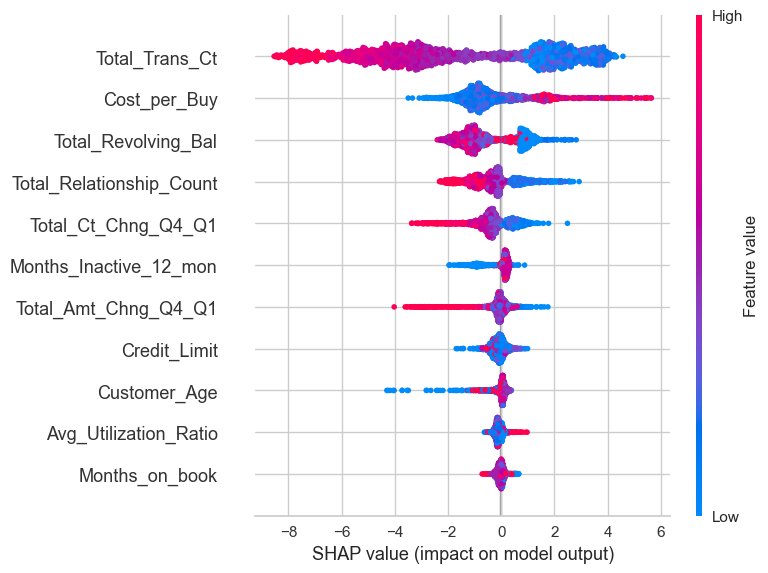

In [118]:
explainer = shap.Explainer(lgbm_model)
# observations = xgb1[0].transform(X_test)
# observations = pd.DataFrame(observations, columns = ['person_income', 'person_emp_length', 'loan_percent_income',
#                                     'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)


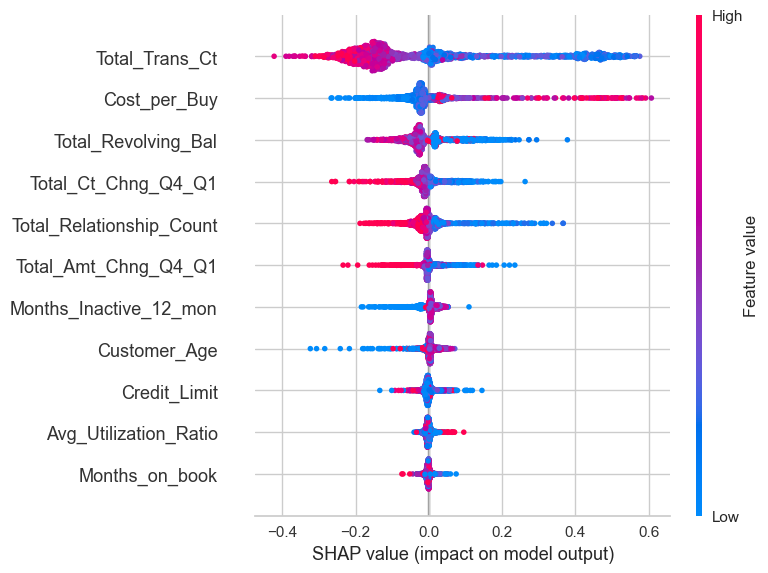

In [112]:
# When set model_output=“probability” in the TreeExplainer, we explain the output of the model transformed into 
# probability space, note that this means the SHAP values now sum to the probability output of the model.
# Also we have to add a background dataset, anywhere from 100 to 1000 random background samples are good sizes to use.

explainer_prob = shap.TreeExplainer(lgbm_model, data = shap.sample(X_test, 100), model_output='probability')

shap_values_prob = explainer_prob.shap_values(X_test)
shap.summary_plot(shap_values_prob, X_test)


In [121]:
shap.force_plot(explainer_prob.expected_value, shap_values_prob[12], feature_names=ft11)


In [ ]:
#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(lgbm_model, model_output='probability')
shap_values = explainer.shap_values(X_test)

#get Shap values from preprocessed data
# shap_values = explainer.shap_values(query)

# #plot the feature importance
# shap.force_plot(explainer.expected_value, shap_values[0,:],query, matplotlib=True,show=False, feature_names=ft11)

# visualize the first prediction's explaination with default colors
shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_test.iloc[0:5,:])


In [ ]:
explainer.expected_value


In [ ]:
y_test[y_test==1]

In [ ]:
y_test_reset = y_test.reset_index(drop=True)

In [ ]:
y_test_reset[y_test_reset==1]

### fit a linear

In [ ]:
# fit in 11 features # no regulation
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train_sm, y_train_sm)

In [ ]:
# Explain model predictions using SHAP
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
query = X_test.iloc[11,:]
#get Shap values from preprocessed data
shap_values = explainer.shap_values(query)
#plot the feature importance
shap.force_plot(explainer.expected_value, shap_values, query, matplotlib=True,show=False, feature_names=ft11)

In [ ]:
# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PowerTransformer
# from sklearn.linear_model import LogisticRegression

# # Create the column transformer
# preprocessor = make_column_transformer(
#     (PowerTransformer(), ft11),
#     remainder='passthrough'
# )

# # Create the pipeline
# pipe = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced', random_state=42))

In [ ]:
# pipe.fit(X_train, y_train)

In [ ]:
transformer = PowerTransformer()
transformer.fit(X_train)
X_train_ft = transformer.transform(X_train)
X_test_ft = transformer.transform(X_test)

In [ ]:
lr_ft = LogisticRegression(random_state=42, class_weight='balanced')
lr_ft.fit(X_train_ft, y_train)

In [ ]:
y_pred =lr_ft.predict(X_test_ft)
scores = recall_score(y_test, y_pred) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
print("logistic regression: {}\t{}".format(scores, metrics.auc(fpr, tpr)))

In [ ]:
# Explain model predictions using SHAP
explainer = shap.LinearExplainer(lr_ft, X_train_ft, model_output='probability')
shap_values = explainer.shap_values(X_test_ft)

In [ ]:
query = X_test_ft[11,:]
#get Shap values from preprocessed data
shap_values = explainer.shap_values(query)
#plot the feature importance
shap.force_plot(explainer.expected_value, shap_values, query, matplotlib=True,show=False, feature_names=ft11)

In [ ]:
X_test_ft[0,:]

### hyperparameter tuning for logistic regression

In [ ]:
# create a logistic regression model
model = LogisticRegression()

# define the hyperparameter space
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

# create a grid search cross-validator
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

# fit the model to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# print the best score
print(f"Best score: {grid_search.best_score_:.2f}")

In [ ]:
lr_model = LogisticRegression(C=5, penalty='l2')
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.

### SHAP explaination

In [ ]:
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

In [ ]:
# explain a single predication
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [ ]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

## fine tune a model

In [ ]:
print("\n" "Training Performance:" "\n")

xgb = XGBClassifier()
model.fit(X_train_sm[ft12], y_train_sm)
scores = recall_score(y_train_sm, model.predict(X_train_sm[ft12])) 
print("{}: {}".format(name, scores))
    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test[ft12])
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {'max_depth': [1,2,3, 4, 5],
              'learning_rate': [0.05, 0.1, 0.2, 0.3]}

# Create the XGBoost classifier
xgb = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')

# Fit the grid search object to the training data
grid_search.fit(X_train_sm[ft12], y_train_sm)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
'learning_rate': 0.1, 'max_depth': 5

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, max_depth = 5, random_state = 42)
xgb.fit(X_train_sm[ft12], y_train_sm)

In [ ]:
scores = recall_score(y_train_sm, xgb.predict(X_train_sm[ft12])) 
print('xgb train recall:', scores)

y_pred =xgb.predict(X_test[ft12])
scores = recall_score(y_test, y_pred) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
print("xgb test recall, auc: {}\t{}".format(scores, metrics.auc(fpr, tpr)))

## Make a pipeline to test deployment

In [ ]:
# need 12 features to be transformed before fit into xgb
ft12

In [ ]:
df.columns

In [ ]:
# pipeline
steps = 

## pipeline a final model

## Shapley value for model